Kelompok 11 (Khusus)

Anggota :
Adri Sapta Firmansyah (2205361)

Penjelasan Data :
Dataset ini mengandung informasi tentang sesi belanja online, termasuk aktivitas pelanggan selama sesi, status produk yang dilihat atau dimasukkan ke dalam keranjang, dan beberapa data profil pelanggan. Setiap sesi mengandung data seperti kapan sesi dimulai, durasi, produk yang dilihat dan dimasukkan ke dalam keranjang, serta apakah sesi tersebut menghasilkan pembelian atau tidak. Atribut dalam dataset dibagi menjadi beberapa kategori utama, seperti waktu sesi, aktivitas belanja, dan profil pelanggan

Atribut Kolom :
1. Atribut Waktu Sesi
- sessionNo: Nomor sesi yang berjalan, digunakan sebagai penomoran urutan dari setiap sesi. Ini adalah bilangan alami.
- startHour: Jam ketika sesi dimulai, dengan nilai antara 0 hingga 23 (format 24 jam).
- startWeekday: Hari dalam seminggu saat sesi dimulai, dengan nilai 1 untuk Senin, 2 untuk Selasa, hingga 7 untuk Minggu.

2. Atribut Durasi Sesi
- duration: Total waktu (dalam detik) yang dihabiskan sejak sesi dimulai. Ini adalah angka desimal non-negatif yang menunjukkan lamanya sesi.

3. Atribut Aktivitas Klik Produk
- cCount: Jumlah produk yang diklik pelanggan selama sesi. Ini adalah bilangan alami.
- cMinPrice: Harga terendah dari produk yang diklik selama sesi, dinyatakan sebagai angka desimal non-negatif.
- cMaxPrice: Harga tertinggi dari produk yang diklik selama sesi, angka desimal non-negatif.
- cSumPrice: Total harga dari semua produk yang diklik selama sesi, angka desimal non-negatif.

4. Atribut Aktivitas Produk di Keranjang Belanja
- bCount: Jumlah produk yang dimasukkan ke dalam keranjang selama sesi, bilangan alami.
- bMinPrice: Harga terendah dari produk yang dimasukkan ke keranjang, angka desimal non-negatif.
- bMaxPrice: Harga tertinggi dari produk yang dimasukkan ke keranjang, angka desimal non-negatif.
- bSumPrice: Total harga dari semua produk yang dimasukkan ke dalam keranjang, angka desimal non-negatif.
- bStep: Langkah dalam proses pembelian yang sedang dilakukan, dengan nilai dari 1 hingga 5. Ini adalah bilangan alami yang menunjukkan tahap proses pembelian yang telah dicapai.

5. Atribut Status Online dan Ketersediaan Produk
- onlineStatus: Indikator apakah pelanggan online atau tidak selama sesi. Memiliki nilai y untuk "ya" dan n untuk "tidak".
- availability: Status ketersediaan atau pengiriman produk yang dilihat, yang menjelaskan apakah produk tersebut bisa dipesan atau tidak (misalnya, "completely orderable," "mainly orderable," dll.).

6. Atribut Profil Pelanggan
- customerID: Nomor unik yang mengidentifikasi pelanggan. Ini adalah string yang digunakan untuk membedakan pelanggan satu sama lain.
- maxVal: Harga pembelian maksimal yang diizinkan untuk pelanggan tersebut. Ini adalah bilangan alami yang menunjukkan batas maksimal harga.
customerScore: Evaluasi atau skor pelanggan dari sudut pandang toko, sebagai bilangan alami.
- accountLifetime: Umur akun pelanggan dalam hitungan bulan, yang menunjukkan berapa lama pelanggan telah memiliki akun di toko.
- payments: Jumlah pembayaran yang telah dilakukan oleh pelanggan. Ini adalah bilangan alami yang menggambarkan riwayat transaksi pelanggan.
- age: Usia pelanggan dalam bilangan alami, yang merupakan usia pelanggan saat sesi berlangsung.
- address: Bentuk sapaan pelanggan (1 untuk Mr, 2 untuk Mrs, 3 untuk Company). Ini adalah bilangan alami yang menunjukkan jenis kelamin atau kategori alamat.
- lastOrder: Waktu dalam hari yang telah berlalu sejak pesanan terakhir pelanggan. Ini adalah bilangan alami yang menunjukkan berapa lama pelanggan tidak melakukan pemesanan.

7. Atribut Hasil Sesi
- order: Hasil dari sesi tersebut, yaitu apakah sesi tersebut menghasilkan pembelian (y untuk pembelian) atau tidak (n untuk non-pembelian).

01. Unduh Library Yang Diperlukan

In [1]:
!pip install pandas numpy seaborn matplotlib
!pip install scikit-learn

2. Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

3. Baca File

In [3]:
# Membaca file sebagai satu kolom
data = pd.read_csv("transact_train.txt", header=None, names=["combined_column"])

4. Copy Data Original

In [4]:
train_original = data.copy()

Membuat salinan data meskipun harus membuat perubahan apapun pada dataset, tidak akan kehilangan data asli

5. Review Dataset

In [5]:
data.head(10)

,combined_column
0,sessionNo|startHour|startWeekday|duration|cCou...
1,1|6|5|0.0|1|59.99|59.99|59.99|1|59.99|59.99|59...
2,1|6|5|11.94|1|59.99|59.99|59.99|1|59.99|59.99|...
3,1|6|5|39.887|1|59.99|59.99|59.99|1|59.99|59.99...
4,2|6|5|0.0|0|?|?|?|0|?|?|?|2|y|completely order...
5,2|6|5|15.633|0|?|?|?|0|?|?|?|?|y|completely or...
6,2|6|5|26.235|0|?|?|?|0|?|?|?|4|y|completely or...
7,2|6|5|71.2|0|?|?|?|0|?|?|?|4|y|completely orde...
8,2|6|5|94.469|0|?|?|?|0|?|?|?|?|y|completely or...
9,3|6|5|181.477|9|29.99|29.99|89.97|1|29.99|29.9...


In [6]:
data.tail()

,combined_column
429009,49998|18|7|5988.882|77|9.99|149.99|5253.28|3|4...
429010,49999|18|7|675.114|6|59.0|199.99|509.96|1|89.9...
429011,49999|18|7|715.341|7|59.0|649.99|1159.95|1|89....
429012,50000|18|7|0.0|1|6.99|6.99|6.99|1|6.99|6.99|6....
429013,50000|18|7|82.943|1|6.99|6.99|6.99|1|6.99|6.99...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429014 entries, 0 to 429013
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   combined_column  429014 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


In [8]:
data.columns

Index(['combined_column'], dtype='object')

6. Split Data (Memperbaiki Tampilan)

In [9]:
if 'combined_column' in data.columns:
    data_split = data['combined_column'].str.split('|', expand=True)

    # Menamai kolom setelah pemisahan
    data_split.columns = ["sessionNo", "startHour", "startWeekday", "duration", "cCount", "cMinPrice", 
                          "cMaxPrice", "cSumPrice", "bCount", "bMinPrice", "bMaxPrice", "bSumPrice", 
                          "bStep", "onlineStatus", "availability", "customerNo", "maxVal", 
                          "customerScore", "accountLifetime", "payments", "age", "address", 
                          "lastOrder", "order"]

    # Cek hasil pemisahan
    print(data_split.head())
else:
    print("Kolom 'combined_column' tidak ditemukan di DataFrame.")

   sessionNo  startHour  startWeekday  duration  cCount  cMinPrice  cMaxPrice  \
0  sessionNo  startHour  startWeekday  duration  cCount  cMinPrice  cMaxPrice   
1          1          6             5       0.0       1      59.99      59.99   
2          1          6             5     11.94       1      59.99      59.99   
3          1          6             5    39.887       1      59.99      59.99   
4          2          6             5       0.0       0          ?          ?   

   cSumPrice  bCount  bMinPrice  ...          availability  customerNo  \
0  cSumPrice  bCount  bMinPrice  ...          availability  customerNo   
1      59.99       1      59.99  ...                     ?           1   
2      59.99       1      59.99  ...  completely orderable           1   
3      59.99       1      59.99  ...  completely orderable           1   
4          ?       0          ?  ...  completely orderable           ?   

   maxVal  customerScore  accountLifetime  payments  age  address  l

In [10]:
# Hapus baris pertama yang berisi nama kolom yang tidak relevan
data_split = data_split.iloc[1:].reset_index(drop=True)

# Atur nama kolom sesuai yang diinginkan
data_split.columns = ["sessionNo", "startHour", "startWeekday", "duration", "cCount", "cMinPrice", 
                      "cMaxPrice", "cSumPrice", "bCount", "bMinPrice", "bMaxPrice", "bSumPrice", 
                      "bStep", "onlineStatus", "availability", "customerNo", "maxVal", 
                      "customerScore", "accountLifetime", "payments", "age", "address", 
                      "lastOrder", "order"]

# Cek hasilnya
print(data_split.head())

  sessionNo startHour startWeekday duration cCount cMinPrice cMaxPrice  \
0         1         6            5      0.0      1     59.99     59.99   
1         1         6            5    11.94      1     59.99     59.99   
2         1         6            5   39.887      1     59.99     59.99   
3         2         6            5      0.0      0         ?         ?   
4         2         6            5   15.633      0         ?         ?   

  cSumPrice bCount bMinPrice  ...          availability customerNo maxVal  \
0     59.99      1     59.99  ...                     ?          1    600   
1     59.99      1     59.99  ...  completely orderable          1    600   
2     59.99      1     59.99  ...  completely orderable          1    600   
3         ?      0         ?  ...  completely orderable          ?      ?   
4         ?      0         ?  ...  completely orderable          ?      ?   

  customerScore accountLifetime payments age address lastOrder order  
0            70      

7. Split Kolom lalu tampilkan dalam bentuk tabel

In [11]:
# Mendefinisikan rentang kolom yang ingin ditampilkan
column_ranges = [
    ["sessionNo", "startHour", "startWeekday", "duration", "cCount", "cMinPrice", "cMaxPrice"],
    ["cSumPrice", "bCount", "bMinPrice", "bMaxPrice", "bSumPrice", "bStep"],
    ["onlineStatus", "availability", "customerNo", "maxVal", "customerScore", "accountLifetime"],
    ["payments", "age", "address", "lastOrder", "order"]
]

# Tampilkan DataFrame dalam bagian
for i, cols in enumerate(column_ranges):
    print(f"\nTable {i + 1}:")
    display(data_split[cols])


Table 1:


,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice
0,1,6,5,0.0,1,59.99,59.99
1,1,6,5,11.94,1,59.99,59.99
2,1,6,5,39.887,1,59.99,59.99
3,2,6,5,0.0,0,?,?
4,2,6,5,15.633,0,?,?
...,...,...,...,...,...,...,...
429008,49998,18,7,5988.882,77,9.99,149.99
429009,49999,18,7,675.114,6,59.0,199.99
429010,49999,18,7,715.341,7,59.0,649.99
429011,50000,18,7,0.0,1,6.99,6.99



Table 2:


,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep
0,59.99,1,59.99,59.99,59.99,?
1,59.99,1,59.99,59.99,59.99,2
2,59.99,1,59.99,59.99,59.99,?
3,?,0,?,?,?,2
4,?,0,?,?,?,?
...,...,...,...,...,...,...
429008,5253.28,3,49.95,99.99,209.93,?
429009,509.96,1,89.99,89.99,89.99,?
429010,1159.95,1,89.99,89.99,89.99,1
429011,6.99,1,6.99,6.99,6.99,?



Table 3:


,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime
0,?,?,1,600,70,21
1,y,completely orderable,1,600,70,21
2,y,completely orderable,1,600,70,21
3,y,completely orderable,?,?,?,?
4,y,completely orderable,?,?,?,?
...,...,...,...,...,...,...
429008,?,?,?,?,?,?
429009,?,?,25038,?,?,?
429010,y,completely orderable,25038,?,?,?
429011,?,?,47,300,537,5



Table 4:


,payments,age,address,lastOrder,order
0,1,43,1,49,y
1,1,43,1,49,y
2,1,43,1,49,y
3,?,?,?,?,y
4,?,?,?,?,y
...,...,...,...,...,...
429008,?,?,?,?,n
429009,0,24,1,4,n
429010,0,24,1,4,n
429011,0,53,1,34,n


8. Cek Missing Value

In [12]:
# Memeriksa jumlah missing values di setiap kolom
missing_values = data_split.isnull().sum()

# Menampilkan kolom dengan jumlah missing values
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
Series([], dtype: int64)


9. Mengganti "?" dengan NaN

In [13]:
# Ganti '?' dengan NaN
data_split.replace("?", np.nan, inplace=True)

# Ubah tipe data kolom yang relevan menjadi numerik, jika perlu
numeric_columns = ["sessionNo", "startHour", "startWeekday", "duration", "cCount", 
                   "cMinPrice", "cMaxPrice", "cSumPrice", "bCount", "bMinPrice", 
                   "bMaxPrice", "bSumPrice", "bStep", "maxVal", "customerScore", 
                   "accountLifetime", "payments", "age", "lastOrder"]

for col in numeric_columns:
    data_split[col] = pd.to_numeric(data_split[col], errors='coerce')

In [14]:
# Mendefinisikan rentang kolom yang ingin ditampilkan
column_ranges = [
    ["sessionNo", "startHour", "startWeekday", "duration", "cCount", "cMinPrice", "cMaxPrice"],
    ["cSumPrice", "bCount", "bMinPrice", "bMaxPrice", "bSumPrice", "bStep"],
    ["onlineStatus", "availability", "customerNo", "maxVal", "customerScore", "accountLifetime"],
    ["payments", "age", "address", "lastOrder", "order"]
]

# Tampilkan DataFrame dalam bagian
for i, cols in enumerate(column_ranges):
    print(f"\nTable {i + 1}:")
    display(data_split[cols])



Table 1:


,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice
0,1,6,5,0.000,1,59.99,59.99
1,1,6,5,11.940,1,59.99,59.99
2,1,6,5,39.887,1,59.99,59.99
3,2,6,5,0.000,0,NaN,NaN
4,2,6,5,15.633,0,NaN,NaN
...,...,...,...,...,...,...,...
429008,49998,18,7,5988.882,77,9.99,149.99
429009,49999,18,7,675.114,6,59.00,199.99
429010,49999,18,7,715.341,7,59.00,649.99
429011,50000,18,7,0.000,1,6.99,6.99



Table 2:


,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep
0,59.99,1,59.99,59.99,59.99,NaN
1,59.99,1,59.99,59.99,59.99,2.0
2,59.99,1,59.99,59.99,59.99,NaN
3,NaN,0,NaN,NaN,NaN,2.0
4,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
429008,5253.28,3,49.95,99.99,209.93,NaN
429009,509.96,1,89.99,89.99,89.99,NaN
429010,1159.95,1,89.99,89.99,89.99,1.0
429011,6.99,1,6.99,6.99,6.99,NaN



Table 3:


,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime
0,NaN,NaN,1,600.0,70.0,21.0
1,y,completely orderable,1,600.0,70.0,21.0
2,y,completely orderable,1,600.0,70.0,21.0
3,y,completely orderable,NaN,NaN,NaN,NaN
4,y,completely orderable,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
429008,NaN,NaN,NaN,NaN,NaN,NaN
429009,NaN,NaN,25038,NaN,NaN,NaN
429010,y,completely orderable,25038,NaN,NaN,NaN
429011,NaN,NaN,47,300.0,537.0,5.0



Table 4:


,payments,age,address,lastOrder,order
0,1.0,43.0,1,49.0,y
1,1.0,43.0,1,49.0,y
2,1.0,43.0,1,49.0,y
3,NaN,NaN,NaN,NaN,y
4,NaN,NaN,NaN,NaN,y
...,...,...,...,...,...
429008,NaN,NaN,NaN,NaN,n
429009,0.0,24.0,1,4.0,n
429010,0.0,24.0,1,4.0,n
429011,0.0,53.0,1,34.0,n


10. Latih Model Awal (Sebelum Penanganan NaN)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# Periksa apakah ada nilai yang masih berupa teks di kolom 'order'
print(data_split['order'].unique())

['y' 'n']


In [16]:
# Label kolom 'order' menjadi 1 untuk 'y' dan 0 untuk 'n'
data_split['order'] = data_split['order'].map({'y': 1, 'n': 0}).astype(int)

In [17]:
# Pisahkan fitur dan target
X = data_split.drop(columns=['order'])
y = data_split['order']

In [18]:
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
# Inisialisasi model
model = LogisticRegression(max_iter=100)

In [20]:
print(y_train.unique())  # Periksa nilai unik dalam y_train

[1 0]


In [21]:
# Tampilkan nilai unik untuk memverifikasi pemetaan
print(data_split['order'].unique())

[1 0]


In [22]:
print(data_split['order'].unique())  # Verifikasi nilai unik di kolom 'order'

[1 0]


In [23]:
# Cek tipe data y_train
print(y_train.dtype)

# Cek apakah semua nilai di y_train sudah dalam bentuk 1 atau 0
print(y_train.unique())

int64
[1 0]


In [24]:
# Konversi semua kolom di X_train dan X_test ke tipe data numerik jika belum
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [25]:
# Latih model pada data pelatihan (sementara isi NaN dengan 0)
model.fit(X_train.fillna(0), y_train)

LogisticRegression()

In [26]:
# Prediksi pada data uji
y_pred = model.predict(X_test.fillna(0))
y_pred_proba = model.predict_proba(X_test.fillna(0))[:, 1]  # Probabilitas untuk kelas 1

In [27]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

In [28]:
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7153512656752599
ROC AUC Score: 0.7132157826098056
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.42      0.49     13843
           1       0.76      0.86      0.80     29059

    accuracy                           0.72     42902
   macro avg       0.67      0.64      0.65     42902
weighted avg       0.70      0.72      0.70     42902



Hasil awal model logistic regression sebelum menangani nilai-nilai yang hilang menunjukkan bahwa model memiliki akurasi sebesar 71.54% dan skor ROC AUC sebesar 71.32%, yang menunjukkan kinerja yang cukup baik dalam memprediksi apakah suatu sesi menghasilkan pesanan atau tidak.

- Precission dan Recall
    - Untuk kelas 0 (non-purchase), precision adalah 0.58 dan recall 0.42, menunjukkan bahwa model cukup sering salah dalam mengklasifikasikan sesi non-purchase.
    - Untuk kelas 1 (purchase), precision adalah 0.76 dan recall 0.86, yang berarti model lebih efektif dalam mengidentifikasi sesi dengan hasil pembelian.

- F1-Score
    - Kelas 0 memiliki F1-score 0.49, menunjukkan tantangan model dalam menangani sesi tanpa pesanan.
    - Kelas 1 memiliki F1-score 0.80, menunjukkan kinerja yang kuat dalam mendeteksi pembelian.

- Macro Average: Macro average lebih rendah daripada weighted average, menunjukkan perbedaan signifikan dalam performa terhadap kedua kelas.

11. Cek Tipe Data

In [29]:
# Memeriksa tipe data dari setiap kolom
data_types = data_split.dtypes

# Menampilkan tipe data
print("Data Types in Each Column:")
print(data_types)

Data Types in Each Column:
sessionNo            int64
startHour            int64
startWeekday         int64
duration           float64
cCount               int64
cMinPrice          float64
cMaxPrice          float64
cSumPrice          float64
bCount               int64
bMinPrice          float64
bMaxPrice          float64
bSumPrice          float64
bStep              float64
onlineStatus        object
availability        object
customerNo          object
maxVal             float64
customerScore      float64
accountLifetime    float64
payments           float64
age                float64
address             object
lastOrder          float64
order                int64
dtype: object


12. Mengambil Sampel untuk Penanganan nilai NaN

In [30]:
# Memilih baris yang memiliki NaN di setidaknya satu kolom
data_with_nan = data_split[data_split.isna().any(axis=1)]
# Mengambil 8 sampel acak dari data yang tersisa
sample_data_with_nan = data_with_nan.sample(n=8, random_state=1)

# Menyisipkan kembali baris dengan indeks 3 dan 4
sample_data_with_nan = pd.concat([data_with_nan.loc[[3, 4]], sample_data_with_nan])

# Mengurutkan ulang indeks agar tampak rapi
sample_data_with_nan = sample_data_with_nan.sort_index()

# Menampilkan tabel
from IPython.display import display
display(sample_data_with_nan.reset_index(drop=True))

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3613,11,5,6249.609,15,14.99,27.99,85.96,2,14.99,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,15535,20,5,3545.578,48,4.99,261.99,1154.57,4,9.99,...,NaN,7686,4000.0,554.0,86.0,5.0,46.0,2,64.0,1
4,16011,21,5,30.048,2,19.99,19.99,39.98,1,19.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,39137,10,7,0.000,1,399.99,399.99,399.99,1,399.99,...,NaN,19306,1500.0,395.0,9.0,86.0,62.0,1,6.0,1
6,40358,11,7,50.016,3,9.99,9.99,19.98,1,9.99,...,NaN,19904,2500.0,531.0,129.0,27.0,34.0,2,22.0,1
7,43782,14,7,0.000,1,9.99,9.99,9.99,1,9.99,...,NaN,21679,4000.0,613.0,247.0,9.0,61.0,2,112.0,0
8,43898,14,7,1390.957,36,29.99,69.95,1234.50,1,34.99,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,46229,15,7,1102.429,8,17.99,17.99,143.92,1,17.99,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Pada sample data ini dapat dilihat dari cMinPirce hingga cSumPrice memiliki nilai kosong namun secara avaibility dia completely orderable yang menunjukkan terdapat aktifitas pembelanjaan

In [31]:
# Mengambil subset dari kolom cCount hingga availability 
# dengan kondisi cCount atau availability adalah NaN
subset_cCount_to_availability_nan = data_split.loc[
    data_split['cCount'].isna() | data_split['availability'].isna(),
    'cCount':'availability'
]

# Menampilkan hasil dalam bentuk tabel
subset_cCount_to_availability_nan.reset_index(drop=True, inplace=True)
print(subset_cCount_to_availability_nan.head(10))


   cCount  cMinPrice  cMaxPrice  cSumPrice  bCount  bMinPrice  bMaxPrice  \
0       1      59.99      59.99      59.99       1      59.99      59.99   
1       9      29.99      29.99      89.97       1      29.99      29.99   
2      11       9.99      29.99     109.95       2       9.99      29.99   
3       4       4.99       4.99      19.96       1       4.99       4.99   
4       4      27.85      27.85      55.70       1      27.85      27.85   
5       6      27.85      27.85     111.40       2      27.85      27.85   
6       9      27.85      27.85     167.10       3      27.85      27.85   
7      16      19.99      27.85     234.07       4      19.99      27.85   
8       1     129.99     129.99     129.99       1     129.99     129.99   
9       2      99.99     129.99     229.98       2      99.99     129.99   

   bSumPrice  bStep onlineStatus availability  
0      59.99    NaN          NaN          NaN  
1      29.99    NaN          NaN          NaN  
2      39.98    NaN

Lalu pada kolom ini dari bStep hingga avaibility terdapat nilai kosong namun kolom sebelumnya terdapat total harga barang yang di klik dan di keranjang menunjukkan bahwa terdapat aktifitas pembelanjaan

Maka Kesimpulannya untuk pengisian nilai NaN di kolom numeric tidak bisa diisi dengan nilai 0 karena NaN disini bukan berarti tidak ada aktifitas pembelanjaan sama sekali

13. Penanganan Mean vs Median untuk kolom numeric

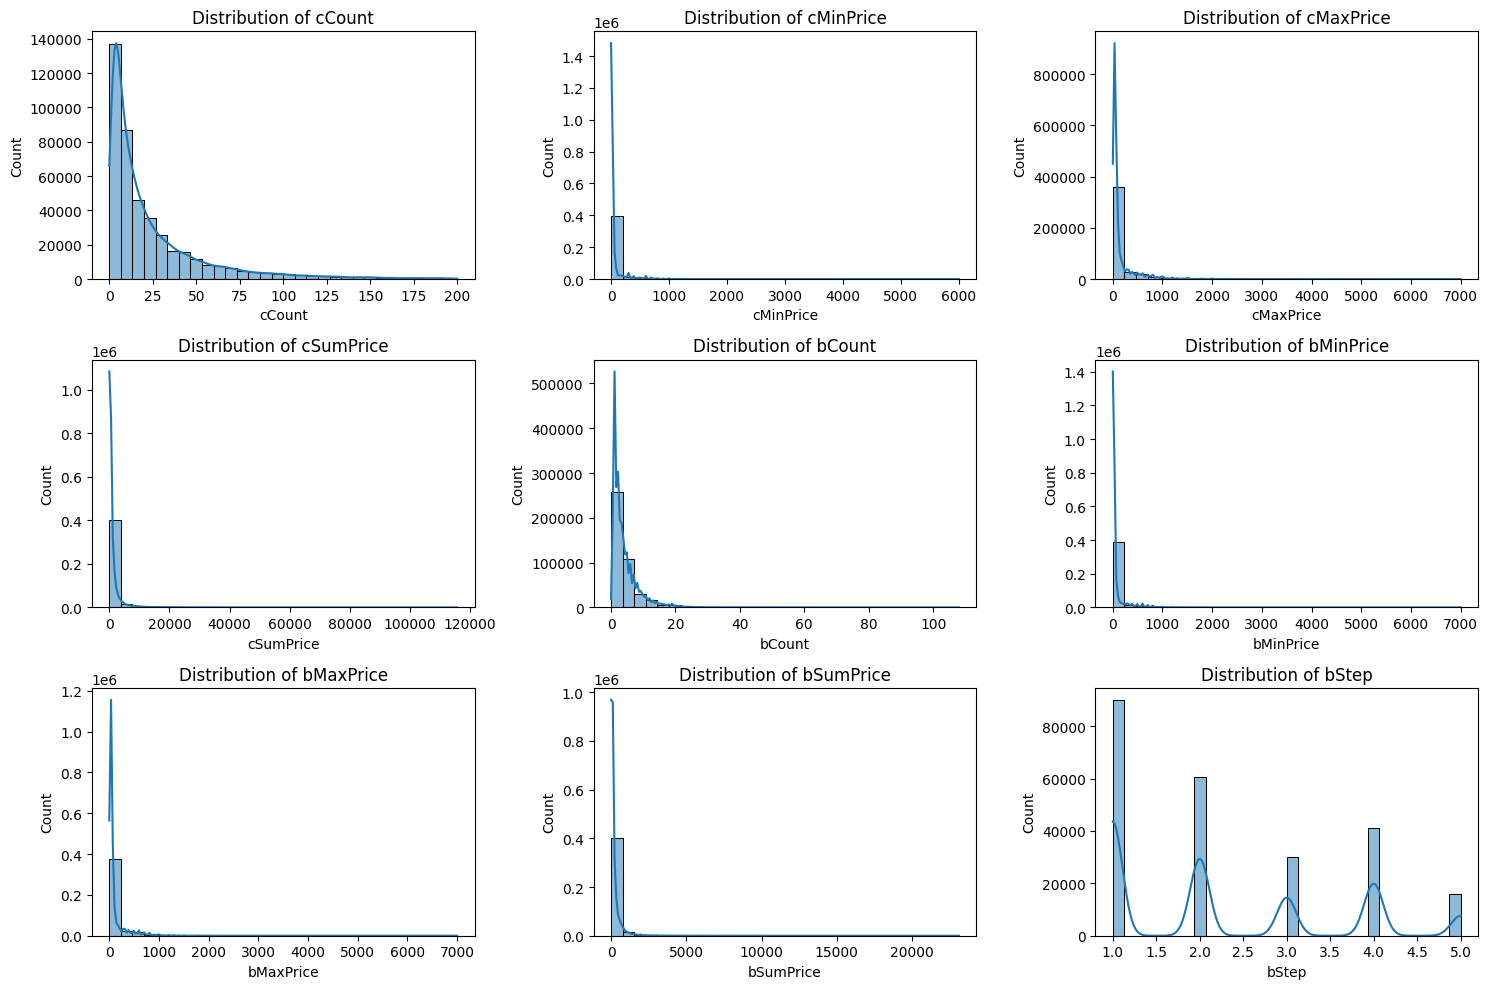

Mean Values:
 cCount         24.140317
cMinPrice      55.289127
cMaxPrice     146.663005
cSumPrice    1189.248209
bCount          4.135168
bMinPrice      67.625341
bMaxPrice     107.505057
bSumPrice     213.260809
bStep           2.292393
dtype: float64

Median Values:
 cCount        13.00
cMinPrice     12.00
cMaxPrice     49.99
cSumPrice    388.00
bCount         3.00
bMinPrice     14.99
bMaxPrice     39.99
bSumPrice     87.97
bStep          2.00
dtype: float64


In [32]:
# Kolom yang ingin dianalisis
columns_to_analyze = ['cCount', 'cMinPrice', 'cMaxPrice', 'cSumPrice', 
                       'bCount', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep']

# Visualisasi distribusi menggunakan histogram
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_split[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Hitung mean dan median
mean_values = data_split[columns_to_analyze].mean()
median_values = data_split[columns_to_analyze].median()

print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)

Perbandingan Mean dan Median:

- cCount: Mean = 24.14, Median = 13.00 — menunjukkan ada outlier.
- cMinPrice: Mean = 55.29, Median = 12.00 — ada outlier yang jelas.
- cMaxPrice: Mean = 146.66, Median = 49.99 — ada outlier yang signifikan.
- cSumPrice: Mean = 1189.25, Median = 388.00 — menunjukkan ketidaknormalan data.
- bCount, bMinPrice, bMaxPrice, bSumPrice: Juga menunjukkan pola serupa.

maka kesimpulannya Median adalah pilihan yang lebih baik untuk menggantikan nilai yang hilang, terutama karena banyak kolom menunjukkan perbedaan yang signifikan antara mean dan median, menandakan kehadiran outlier.

14. Isi missing value kolom numeric dengan nilai median

In [33]:
# Filling NaN values in each specified column with its median
for col in columns_to_analyze:
    median_value = median_values[col]
    data_split[col].fillna(median_value, inplace=True)

# Verify that there are no remaining NaN values in the columns
print(data_split[columns_to_analyze].isna().sum())

cCount       0
cMinPrice    0
cMaxPrice    0
cSumPrice    0
bCount       0
bMinPrice    0
bMaxPrice    0
bSumPrice    0
bStep        0
dtype: int64


In [34]:
# Tampilkan DataFrame dalam bagian
for i, cols in enumerate(column_ranges):
    print(f"\nTable {i + 1}:")
    display(data_split[cols])


Table 1:


,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice
0,1,6,5,0.000,1,59.99,59.99
1,1,6,5,11.940,1,59.99,59.99
2,1,6,5,39.887,1,59.99,59.99
3,2,6,5,0.000,0,12.00,49.99
4,2,6,5,15.633,0,12.00,49.99
...,...,...,...,...,...,...,...
429008,49998,18,7,5988.882,77,9.99,149.99
429009,49999,18,7,675.114,6,59.00,199.99
429010,49999,18,7,715.341,7,59.00,649.99
429011,50000,18,7,0.000,1,6.99,6.99



Table 2:


,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep
0,59.99,1,59.99,59.99,59.99,2.0
1,59.99,1,59.99,59.99,59.99,2.0
2,59.99,1,59.99,59.99,59.99,2.0
3,388.00,0,14.99,39.99,87.97,2.0
4,388.00,0,14.99,39.99,87.97,2.0
...,...,...,...,...,...,...
429008,5253.28,3,49.95,99.99,209.93,2.0
429009,509.96,1,89.99,89.99,89.99,2.0
429010,1159.95,1,89.99,89.99,89.99,1.0
429011,6.99,1,6.99,6.99,6.99,2.0



Table 3:


,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime
0,NaN,NaN,1,600.0,70.0,21.0
1,y,completely orderable,1,600.0,70.0,21.0
2,y,completely orderable,1,600.0,70.0,21.0
3,y,completely orderable,NaN,NaN,NaN,NaN
4,y,completely orderable,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
429008,NaN,NaN,NaN,NaN,NaN,NaN
429009,NaN,NaN,25038,NaN,NaN,NaN
429010,y,completely orderable,25038,NaN,NaN,NaN
429011,NaN,NaN,47,300.0,537.0,5.0



Table 4:


,payments,age,address,lastOrder,order
0,1.0,43.0,1,49.0,1
1,1.0,43.0,1,49.0,1
2,1.0,43.0,1,49.0,1
3,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...
429008,NaN,NaN,NaN,NaN,0
429009,0.0,24.0,1,4.0,0
429010,0.0,24.0,1,4.0,0
429011,0.0,53.0,1,34.0,0


15. Penanganan Kolom lain

mencari korelasi onlineStatus dari startHour dan startWeekday

In [35]:
# Tampilkan 10 baris pertama dari kolom onlineStatus, startHour, dan startWeekday
print("Head of onlineStatus, startHour, and startWeekday:")
print(data_split[['onlineStatus', 'startHour', 'startWeekday']].head(10))

# Tampilkan 10 baris terakhir dari kolom onlineStatus, startHour, dan startWeekday
print("\nTail of onlineStatus, startHour, and startWeekday:")
print(data_split[['onlineStatus', 'startHour', 'startWeekday']].tail(10))

Head of onlineStatus, startHour, and startWeekday:
  onlineStatus  startHour  startWeekday
0          NaN          6             5
1            y          6             5
2            y          6             5
3            y          6             5
4            y          6             5
5            y          6             5
6            y          6             5
7            y          6             5
8          NaN          6             5
9          NaN          6             5

Tail of onlineStatus, startHour, and startWeekday:
       onlineStatus  startHour  startWeekday
429003            y         18             7
429004          NaN         18             7
429005            y         18             7
429006          NaN         18             7
429007          NaN         18             7
429008          NaN         18             7
429009          NaN         18             7
429010            y         18             7
429011          NaN         18             7
429012 

In [36]:
# Filter data untuk nilai onlineStatus yang bernilai 'n'
offline_data = data_split[data_split['onlineStatus'] == 'n']

# Menampilkan beberapa data awal dari hasil filter
print(offline_data[['onlineStatus', 'startHour', 'startWeekday']].head())
print(offline_data[['onlineStatus', 'startHour', 'startWeekday']].tail())

     onlineStatus  startHour  startWeekday
1571            n          7             5
1572            n          7             5
1573            n          7             5
1574            n          7             5
1575            n          7             5
       onlineStatus  startHour  startWeekday
424944            n         18             7
424945            n         18             7
424946            n         18             7
424947            n         18             7
425901            n         18             7


In [37]:
# Tabel distribusi untuk startHour dan startWeekday saat onlineStatus = 'n'
offline_distribution = offline_data.groupby(['startWeekday', 'startHour']).size().unstack(fill_value=0)

print("Distribusi 'n' pada onlineStatus berdasarkan Hari dan Jam Mulai:")
print(offline_distribution)

Distribusi 'n' pada onlineStatus berdasarkan Hari dan Jam Mulai:
startHour     0   1   2   6   7    8   9    10  11  12  ...  14  15  16  17  \
startWeekday                                            ...                   
5              0   0   0   0  23  146  41   24  21   1  ...  18   0   4  33   
6             28  28  80   0   0   31  24  247  29   0  ...  12  28  43  49   
7              5  22  10   8   0    1  78  166  45  36  ...  31   5  22  19   

startHour     18  19  20  21   22   23  
startWeekday                            
5             13  70  45  32  172  518  
6             25  21  73  51  178  382  
7             45   0   0   0    0    0  

[3 rows x 21 columns]


Berdasarkan pola distribusi onlineStatus = 'n', kita bisa membuat aturan khusus untuk mengisi nilai NaN di kolom onlineStatus dengan mempertimbangkan kolom startHour dan startWeekday. Berikut adalah beberapa aturan yang dapat digunakan:

1. Jam dan Hari Offline Dominan (Isi dengan 'n'):
- Hari ke-5 (kemungkinan Jumat): Isi dengan 'n' jika startHour berada di rentang jam 7-9 atau 22-23.
- Hari ke-6 (kemungkinan Sabtu): Isi dengan 'n' jika startHour berada di jam 22-23.
- Hari ke-7 (kemungkinan Minggu): Isi dengan 'n' jika startHour berada di rentang jam 8-11.

2. Jam dan Hari dengan Aktivitas Online (Isi dengan 'y'):
- Jika tidak termasuk dalam kondisi di atas, atau jika berada di jam yang biasanya banyak diisi oleh 'y', seperti jam 10-21 pada hari kerja (Senin hingga Kamis), maka nilai NaN diisi dengan 'y'.

Pengecekan kolom avaibility dengan mengecek masing2 kategori dan korelasinya dengan kolom lain

In [38]:
# Menyaring data yang hanya memiliki nilai 'availability' yang tidak null
availability_stats = data_split[['accountLifetime', 'customerScore', 'bCount', 'cCount', 'availability']].dropna(subset=['availability'])

# Menggunakan describe untuk mendeskripsikan statistik dari setiap fitur berdasarkan kategori 'availability'
availability_stats_desc = availability_stats.groupby('availability').describe()

# Menampilkan hasil
print(availability_stats_desc)

                            accountLifetime                               \
                                      count        mean         std  min   
availability                                                               
completely not determinable           598.0   99.500000  105.548924  0.0   
completely not orderable              696.0  131.824713  109.005779  0.0   
completely orderable               162305.0  133.886319  109.052868  0.0   
mainly not determinable               127.0  137.251969  116.764719  1.0   
mainly not orderable                  218.0  147.018349  110.459742  0.0   
mainly orderable                     4292.0  146.424744  112.828575  0.0   
mixed                                 783.0  135.475096  107.727118  0.0   

                                                       customerScore  \
                              25%    50%    75%    max         count   
availability                                                           
completely not determin

Berdasarkan data maka kita dapat menyimpulkan bahwa :

- Completely Orderable: Kemungkinan besar diterapkan untuk pelanggan yang lebih lama atau memiliki skor pelanggan tinggi (loyal). Fitur seperti accountLifetime yang lebih panjang dan customerScore yang lebih tinggi mungkin menunjukkan bahwa pelanggan ini memiliki akses ke barang-barang yang lebih mudah dipesan.

- Mainly Orderable: Biasanya berlaku untuk pelanggan dengan tingkat loyalitas atau aktivitas sedang. Mungkin accountLifetime dan customerScore mereka masih dalam tingkat menengah, atau mereka aktif berinteraksi dengan produk (misalnya, memiliki bCount atau cCount yang moderat).

- Completely Not Orderable: Bisa jadi untuk pelanggan baru, atau pelanggan yang tidak aktif, dengan accountLifetime dan customerScore yang rendah. Pengguna ini mungkin tidak memiliki cukup interaksi dengan sistem untuk memesan banyak barang.

- Mixed: Kemungkinan besar diterapkan pada pengguna yang memiliki pola interaksi campuran, seperti pelanggan yang melakukan banyak pencarian atau menambah banyak barang ke dalam keranjang tetapi tidak menyelesaikan pembelian. Ini bisa tercermin dari kolom cCount dan bCount yang tinggi.

- Mainly Not Orderable: Bisa diterapkan untuk pengguna dengan sedikit aktivitas dan interaksi dalam sistem. bCount dan cCount yang rendah mungkin menunjukkan preferensi yang terbatas atau tidak konsisten.

- Completely Not Determinable: Biasanya digunakan ketika data tidak cukup jelas atau lengkap untuk menentukan kategori yang tepat. Ini bisa terjadi ketika atribut lain seperti age, lastOrder, atau payments tidak memberikan cukup informasi untuk menganalisis status ketersediaan produk secara akurat.

- Mainly Not Determinable: Ini mungkin digunakan ketika ada ketidakpastian dalam data atau ketika pengambilan keputusan sangat tergantung pada pola perilaku yang tidak dapat dipastikan, seperti interaksi yang sangat rendah.

16. Cek Missing Value untuk kolom yang lain

In [39]:
# Menampilkan jumlah NaN per kolom
nan_counts = data_split.isna().sum()
print(nan_counts)

sessionNo               0
startHour               0
startWeekday            0
duration                0
cCount                  0
cMinPrice               0
cMaxPrice               0
cSumPrice               0
bCount                  0
bMinPrice               0
bMaxPrice               0
bSumPrice               0
bStep                   0
onlineStatus       160379
availability       165255
customerNo         151098
maxVal             153740
customerScore      153740
accountLifetime    153740
payments           151098
age                151396
address            151098
lastOrder          151098
order                   0
dtype: int64


isi missing value kolom onlineStatus sesuai pola yang di definisikan

In [40]:
def fill_online_status(row):
    # Kondisi untuk mengisi 'n' berdasarkan hari dan jam
    if ((row['startWeekday'] == 5 and row['startHour'] in range(7, 10)) or
        (row['startWeekday'] == 5 and row['startHour'] in range(22, 24)) or
        (row['startWeekday'] == 6 and row['startHour'] in range(22, 24)) or
        (row['startWeekday'] == 7 and row['startHour'] in range(8, 12))):
        return 'n'
    else:
        return 'y'

# Terapkan aturan ini pada kolom onlineStatus yang NaN
data_split['onlineStatus'] = data_split['onlineStatus'].fillna(data_split.apply(fill_online_status, axis=1))

isi kolom Adress dengan modus

In [41]:
data_split['address'].fillna(data_split['address'].mode()[0], inplace=True)

Untuk kolom customerNo (customerId) ini adalah string unik mengenai identitas user maka penanganan dilakukan dengan menghapus nilai NaN pada kolom ini, karena customer ID seharusnya unik dan tidak ada tempat untuk NaN di kolom ini.

In [42]:
data_split.dropna(subset=['customerNo'], inplace=True)

isi kolom maxVal dengan median

In [43]:
data_split['maxVal'].fillna(data_split['maxVal'].median(), inplace=True)

isi kolom customerScore dengan Median

In [44]:
data_split['customerScore'].fillna(data_split['customerScore'].median(), inplace=True)

isi kolom AccountLifetime dengan median

In [45]:
data_split['accountLifetime'].fillna(data_split['accountLifetime'].median(), inplace=True)

Isi kolom Avaibility sesuai dengan pola yang telah di definisikan

In [46]:
import numpy as np

def fill_availability(row):
    if pd.isna(row['availability']):
        # Rule 1: High accountLifetime and customerScore -> completely orderable
        if row['accountLifetime'] > 140 and row['customerScore'] > 100:
            return 'completely orderable'
        
        # Rule 2: Low accountLifetime and customerScore -> completely not orderable or mainly not orderable
        elif row['accountLifetime'] < 60 and row['customerScore'] < 50:
            return 'completely not orderable'
        
        # Rule 3: High bCount or cCount -> completely orderable or mainly orderable
        elif row['bCount'] > 10 or row['cCount'] > 10:
            return 'completely orderable'
        
        # Rule 4: Low bCount or cCount -> completely not orderable or mixed
        elif row['bCount'] <= 5 or row['cCount'] <= 5:
            return 'completely not orderable'
        
        # Rule 5: AccountLifetime and customerScore are medium -> mixed or mainly orderable
        else:
            return 'mixed'
    else:
        return row['availability']

# Terapkan ke dataframe
data_split['availability'] = data_split.apply(fill_availability, axis=1)


Pengecekan ulang untuk kolom lainnya, lalu jika masi ada missing value maka tangani, dan konversi tipe data sesuai dengan fitur kolom yang dispesifikasikan di soal

In [47]:
# Mengubah nilai 'age' menjadi integer, jika ada nilai desimal
data_split['age'] = data_split['age'].astype('Int64')

# Jika terdapat NaN pada kolom 'age', Anda bisa menggantinya dengan median atau nilai lain
data_split['age'].fillna(data_split['age'].median(), inplace=True)

In [48]:
# List of columns to convert to Int64
columns_to_convert = ['maxVal', 'customerScore', 'accountLifetime', 'payments']

# Convert columns to Int64 (nullable integer type)
data_split[columns_to_convert] = data_split[columns_to_convert].astype('Int64')

# Check the data types after conversion
print(data_split[columns_to_convert].dtypes)

maxVal             Int64
customerScore      Int64
accountLifetime    Int64
payments           Int64
dtype: object


In [49]:
# Mengisi NaN dengan median dan mengonversi tipe data menjadi integer
data_split['lastOrder'].fillna(data_split['lastOrder'].median(), inplace=True)

# Mengonversi kolom 'lastOrder' ke tipe integer (natural number)
data_split['lastOrder'] = data_split['lastOrder'].astype(int)

17. Cek missing value kembali setelah ditangani

In [50]:
# Menampilkan jumlah NaN per kolom
nan_counts = data_split.isna().sum()
print(nan_counts)

sessionNo          0
startHour          0
startWeekday       0
duration           0
cCount             0
cMinPrice          0
cMaxPrice          0
cSumPrice          0
bCount             0
bMinPrice          0
bMaxPrice          0
bSumPrice          0
bStep              0
onlineStatus       0
availability       0
customerNo         0
maxVal             0
customerScore      0
accountLifetime    0
payments           0
age                0
address            0
lastOrder          0
order              0
dtype: int64


18. Review Dataset setelah penanganan missing value

In [51]:
# Tampilkan DataFrame dalam bagian
for i, cols in enumerate(column_ranges):
    print(f"\nTable {i + 1}:")
    display(data_split[cols])


Table 1:


,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice
0,1,6,5,0.000,1,59.99,59.99
1,1,6,5,11.940,1,59.99,59.99
2,1,6,5,39.887,1,59.99,59.99
8,3,6,5,181.477,9,29.99,29.99
9,3,6,5,297.018,11,9.99,29.99
...,...,...,...,...,...,...,...
428972,49995,18,7,572.544,22,9.99,19.99
429009,49999,18,7,675.114,6,59.00,199.99
429010,49999,18,7,715.341,7,59.00,649.99
429011,50000,18,7,0.000,1,6.99,6.99



Table 2:


,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice,bStep
0,59.99,1,59.99,59.99,59.99,2.0
1,59.99,1,59.99,59.99,59.99,2.0
2,59.99,1,59.99,59.99,59.99,2.0
8,89.97,1,29.99,29.99,29.99,2.0
9,109.95,2,9.99,29.99,39.98,2.0
...,...,...,...,...,...,...
428972,319.60,2,9.99,19.95,29.94,2.0
429009,509.96,1,89.99,89.99,89.99,2.0
429010,1159.95,1,89.99,89.99,89.99,1.0
429011,6.99,1,6.99,6.99,6.99,2.0



Table 3:


,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime
0,y,completely not orderable,1,600,70,21
1,y,completely orderable,1,600,70,21
2,y,completely orderable,1,600,70,21
8,y,completely orderable,3,1800,475,302
9,y,completely orderable,3,1800,475,302
...,...,...,...,...,...,...
428972,y,completely orderable,25037,800,522,63
429009,y,completely not orderable,25038,1500,520,109
429010,y,completely orderable,25038,1500,520,109
429011,y,completely not orderable,47,300,537,5



Table 4:


,payments,age,address,lastOrder,order
0,1,43,1,49,1
1,1,43,1,49,1
2,1,43,1,49,1
8,12,45,1,11,1
9,12,45,1,11,1
...,...,...,...,...,...
428972,2,42,2,9,0
429009,0,24,1,4,0
429010,0,24,1,4,0
429011,0,53,1,34,0


konversi kolom bStep karena seharusnya natural number

In [52]:
# Mengonversi kolom 'bStep' ke tipe integer (natural number)
data_split['bStep'] = data_split['bStep'].astype(int)

Eksploratory Data Analyst (EDA)

In [53]:
!pip install tabulate

1. Statistik Deskriptif

In [54]:
from tabulate import tabulate
# Menyusun statistik deskriptif dalam DataFrame
desc_stats = data_split.describe().transpose()

# Menampilkan tabel dengan format yang lebih rapi
print(tabulate(desc_stats, headers='keys', tablefmt='pretty', showindex=True))

+-----------------+----------+--------------------+--------------------+------+----------+---------+-----------+-----------+
|                 |  count   |        mean        |        std         | min  |   25%    |   50%   |    75%    |    max    |
+-----------------+----------+--------------------+--------------------+------+----------+---------+-----------+-----------+
|    sessionNo    | 277915.0 |  25608.0404836011  | 14466.357210866156 | 1.0  | 13029.0  | 26045.0 |  37990.0  |  50000.0  |
|    startHour    | 277915.0 | 14.63804040803843  | 4.338690715713151  | 0.0  |   11.0   |  15.0   |   18.0    |   23.0    |
|  startWeekday   | 277915.0 | 5.944144792472518  | 0.7898492974781847 | 5.0  |   5.0    |   6.0   |    7.0    |    7.0    |
|    duration     | 277915.0 | 1599.2975962722417 | 2434.4078785012857 | 0.0  | 238.3585 | 762.76  | 1919.2565 | 21553.323 |
|     cCount      | 277915.0 | 25.692110897216775 | 31.067840480762083 | 1.0  |   6.0    |  14.0   |   33.0    |   200.0   |


2. Cek Outlier pada kolom Numeric

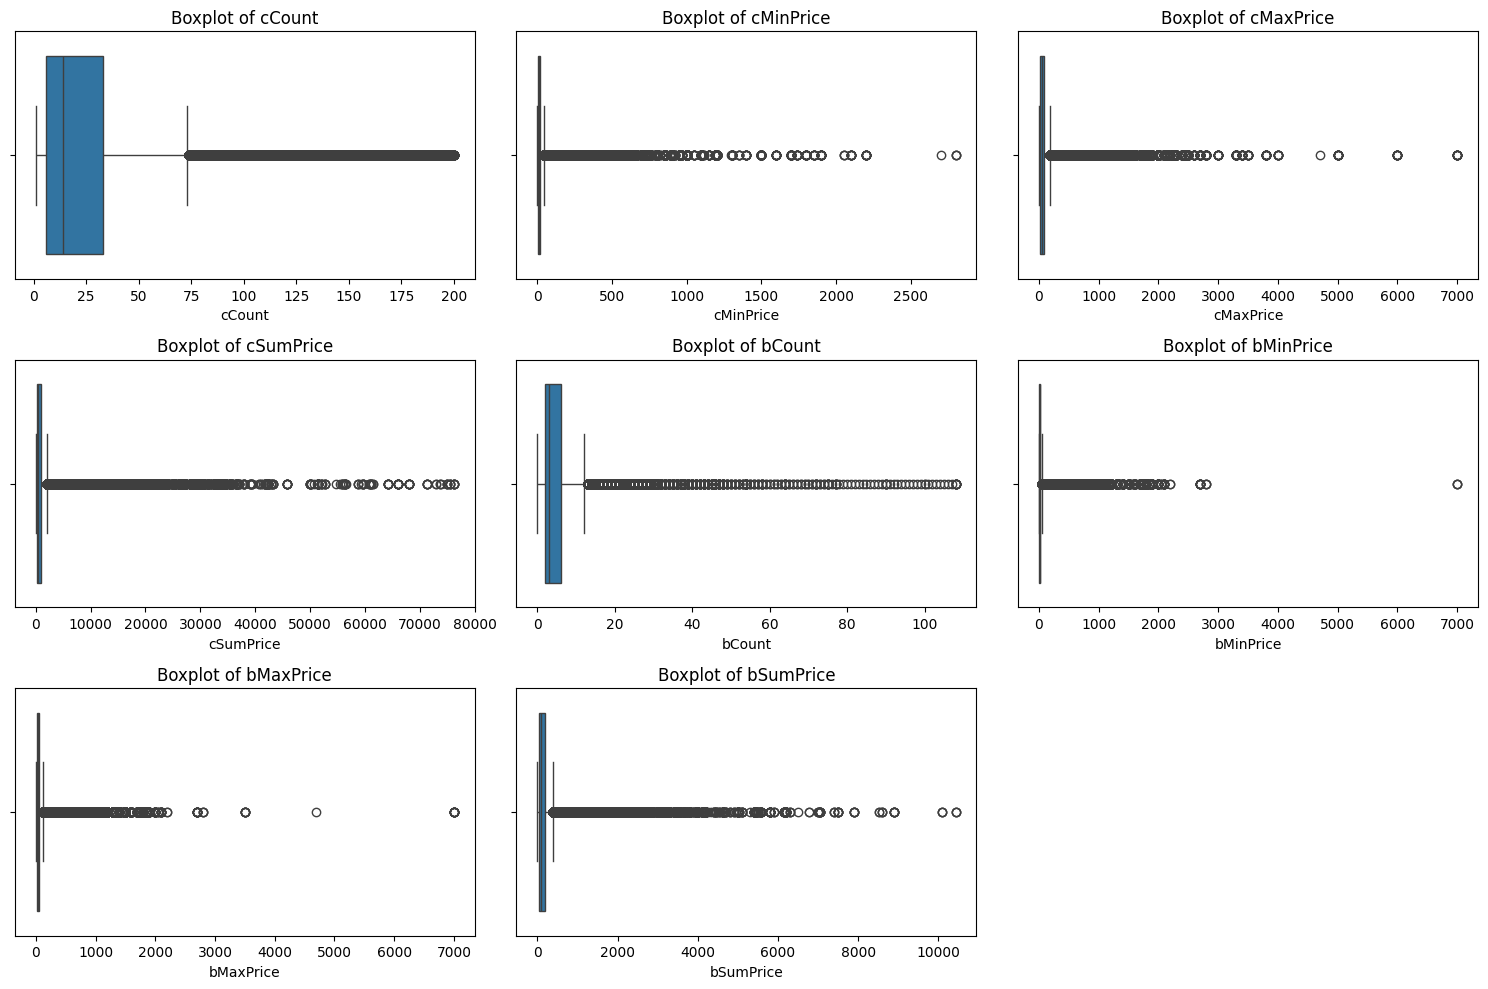

In [55]:
# Kolom yang ingin dianalisis untuk outlier
columns_to_analyze = ['cCount', 'cMinPrice', 'cMaxPrice', 'cSumPrice', 
                       'bCount', 'bMinPrice', 'bMaxPrice', 'bSumPrice']

# Visualisasi boxplot untuk setiap kolom
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data_split, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

cek jumlah outlier dengan metode intequartile

In [56]:
# Menghitung IQR untuk mendeteksi outlier
Q1 = data_split[columns_to_analyze].quantile(0.25)
Q3 = data_split[columns_to_analyze].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan kolom dan apakah ada data yang berada di luar batas tersebut
outliers = (data_split[columns_to_analyze] < lower_bound) | (data_split[columns_to_analyze] > upper_bound)
outlier_counts = outliers.sum()

print("Outlier Counts for Each Column:")
print(outlier_counts)

Outlier Counts for Each Column:
cCount       22009
cMinPrice    33950
cMaxPrice    37660
cSumPrice    26429
bCount       16057
bMinPrice    34925
bMaxPrice    33841
bSumPrice    26573
dtype: int64


3. Analisis Outlier

In [57]:
# Misalkan df adalah dataframe Anda, dan 'bSumPrice' adalah kolom yang ingin dianalisis
Q1 = data_split['bSumPrice'].quantile(0.25)
Q3 = data_split['bSumPrice'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Temukan indeks outlier
outliers = data_split[(data_split['bSumPrice'] < lower_bound) | (data_split['bSumPrice'] > upper_bound)]

# Menampilkan indeks outlier
outliers_index = outliers.index
print(outliers_index)

Index([   634,    635,    636,    637,    638,    639,    640,    641,    857,
          858,
       ...
       428428, 428429, 428430, 428431, 428432, 428433, 428434, 428435, 428436,
       428437],
      dtype='int64', length=26573)


In [58]:
# Menampilkan kolom tertentu yang terkait dengan outlier
outliers_data = data_split.loc[outliers_index, ['sessionNo', 'bSumPrice']]
print(outliers_data)

        sessionNo  bSumPrice
634            90     449.83
635            90     449.83
636            90     449.83
637            90     449.83
638            90     449.83
...           ...        ...
428433      49947    1299.97
428434      49947    1299.97
428435      49947    1299.97
428436      49947    1299.97
428437      49947    1299.97

[26573 rows x 2 columns]


In [59]:
outliers = data_split[data_split['bSumPrice'] > data_split['maxVal']]
print(outliers)

        sessionNo  startHour  startWeekday  duration  cCount  cMinPrice  \
413            58          6             5  1058.891      40      24.99   
414            58          6             5  1244.924      44      24.99   
415            58          6             5  1260.948      44      24.99   
416            58          6             5  1287.480      45      24.99   
417            58          6             5  2159.052      46      24.99   
...           ...        ...           ...       ...     ...        ...   
428437      49947         18             7  4050.174      17     149.99   
428849      49985         18             7  4289.009      39       9.99   
428850      49985         18             7  4374.680      39       9.99   
428851      49985         18             7  4407.329      39       9.99   
428852      49985         18             7  4429.860      39       9.99   

        cMaxPrice  cSumPrice  bCount  bMinPrice  ...          availability  \
413         79.95    

Hasil Analisa dan Penanganan Selanjutnya :

- Untuk kolom harga maksimum produk yang diklik (cMaxPrice) atau diletakkan dalam keranjang (bMaxPrice), masuk akal jika harganya tidak melebihi maxVal, karena ini dapat dianggap sebagai batas kemampuan atau preferensi belanja pelanggan. Oleh karena itu, jika harga maksimum melebihi maxVal, kita dapat menerapkan capping atau menandainya sebagai outlier.

- Kolom cSumPrice (jumlah harga produk yang diklik) dan bSumPrice (jumlah harga produk dalam keranjang) sebaiknya juga tidak melebihi maxVal, karena total ini secara logis tidak boleh melebihi batas belanja yang dapat dilakukan pelanggan. Kita dapat melakukan capping pada nilai ini agar sesuai dengan maxVal.

- cCount dan bCount: Kolom ini mencatat jumlah produk yang diklik atau diletakkan dalam keranjang. Secara teori, jumlah produk yang dipilih pelanggan mungkin tidak perlu dibatasi oleh maxVal, karena maxVal lebih relevan untuk batas harga. 

- cMinPrice dan bMinPrice: Untuk harga minimum produk, pembatasan dengan maxVal mungkin kurang relevan karena harga minimum mungkin jauh di bawah maxVal. Namun, nilai-nilai ini sebaiknya tetap diperiksa agar masuk akal (misalnya, tidak bernilai sangat rendah seperti 0 atau nilai negatif yang tidak mungkin).

In [60]:
# Terapkan capping pada kolom harga
data_split['cMaxPrice'] = data_split.apply(lambda x: min(x['cMaxPrice'], x['maxVal']), axis=1)
data_split['bMaxPrice'] = data_split.apply(lambda x: min(x['bMaxPrice'], x['maxVal']), axis=1)
data_split['cSumPrice'] = data_split.apply(lambda x: min(x['cSumPrice'], x['maxVal']), axis=1)
data_split['bSumPrice'] = data_split.apply(lambda x: min(x['bSumPrice'], x['maxVal']), axis=1)

In [61]:
# Periksa untuk nilai negatif atau nol pada cMinPrice dan bMinPrice
invalid_cMinPrice = data_split[data_split['cMinPrice'] <= 0]
invalid_bMinPrice = data_split[data_split['bMinPrice'] <= 0]

# Tampilkan data yang invalid untuk analisis lebih lanjut
print("Data cMinPrice yang invalid:")
print(invalid_cMinPrice)

print("Data bMinPrice yang invalid:")
print(invalid_bMinPrice)

Data cMinPrice yang invalid:
        sessionNo  startHour  startWeekday  duration  cCount  cMinPrice  \
1684          244          7             5  3331.679      49        0.0   
1685          244          7             5  3336.961      49        0.0   
1686          244          7             5  3342.173      49        0.0   
2960          438          7             5  1031.071     167        0.0   
2961          438          7             5  1042.170     170        0.0   
...           ...        ...           ...       ...     ...        ...   
427318      49810         18             7   691.462       9        0.0   
427319      49810         18             7   700.159       9        0.0   
427320      49810         18             7   754.257       9        0.0   
427321      49810         18             7   793.697       9        0.0   
427322      49810         18             7   817.223       9        0.0   

        cMaxPrice  cSumPrice  bCount  bMinPrice  ...  \
1684        40

In [62]:
# Ganti nilai 0.0 pada cMinPrice dengan median kolom tersebut
data_split['cMinPrice'] = data_split['cMinPrice'].apply(lambda x: data_split['cMinPrice'].median() if x == 0 else x)

# Ganti nilai 0.0 pada bMinPrice dengan median kolom tersebut
data_split['bMinPrice'] = data_split['bMinPrice'].apply(lambda x: data_split['bMinPrice'].median() if x == 0 else x)

3.  Histograms untuk distribusi kolom numeric:

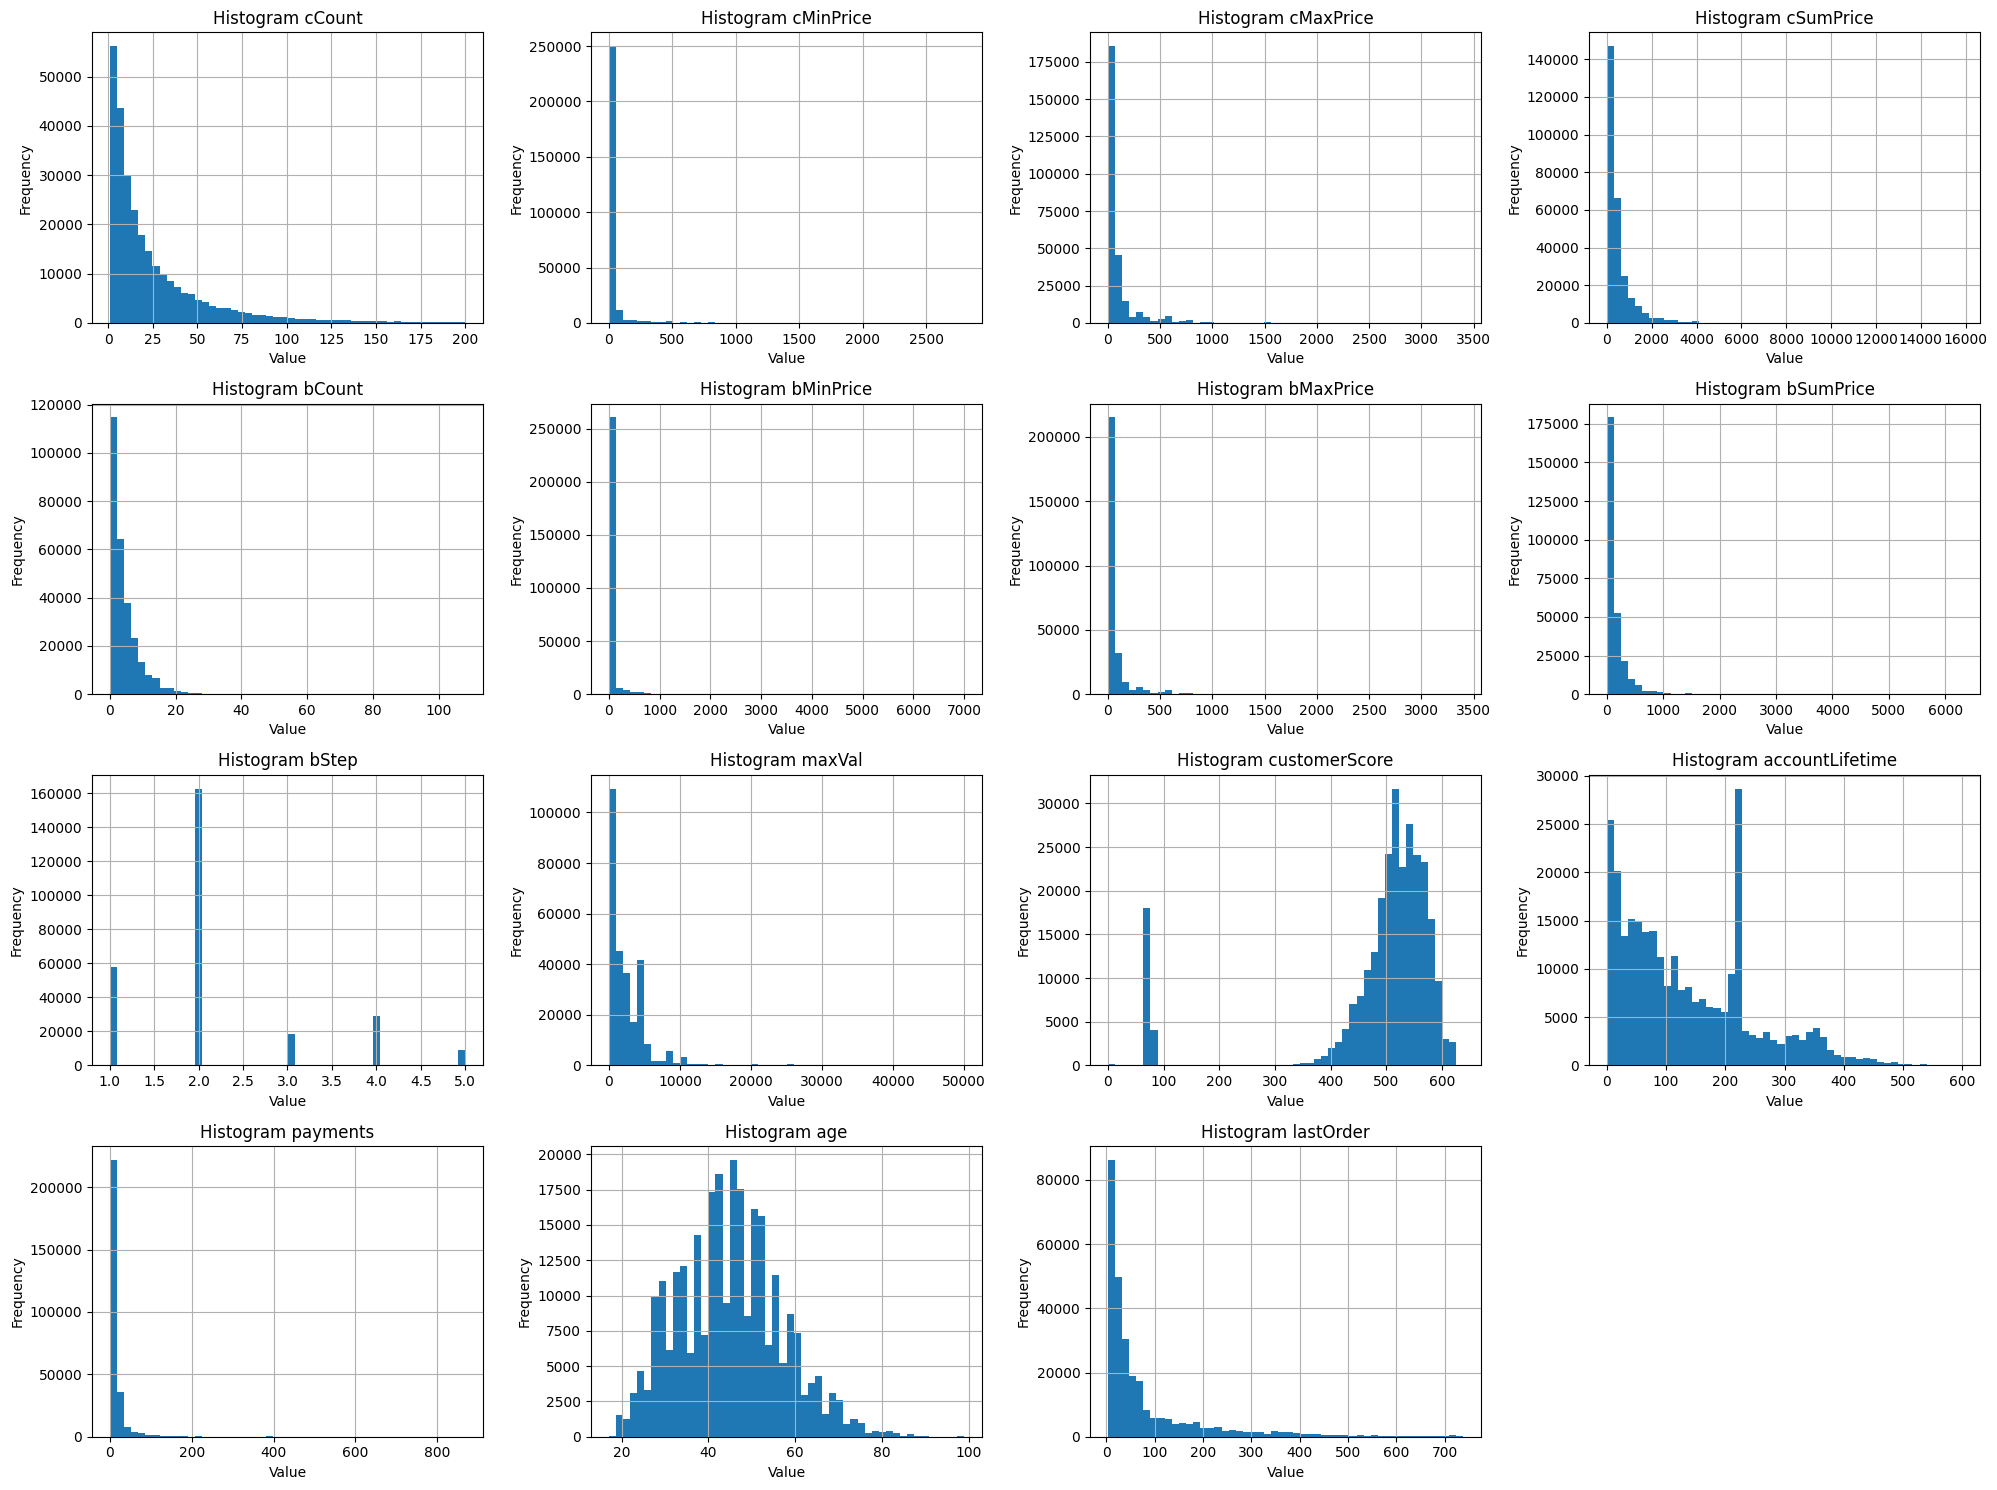

In [63]:
# Menampilkan histogram untuk beberapa kolom numerik
numerical_columns = ['cCount', 'cMinPrice', 'cMaxPrice', 'cSumPrice', 'bCount', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'lastOrder']

# Membuat histogram untuk setiap kolom numerik
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # Membuat subplot untuk setiap kolom
    data_split[col].hist(bins=50)
    plt.title(f'Histogram {col}')
    plt.xlabel('Value')  # Label sumbu X
    plt.ylabel('Frequency')  # Label sumbu Y
plt.tight_layout()
plt.show()

- cCount (Jumlah Klik Produk) - Sebagian besar sesi hanya memiliki beberapa klik produk, dengan jumlah yang berkurang drastis pada nilai yang lebih tinggi, menunjukkan distribusi yang sangat miring ke kanan.

- cMinPrice, cMaxPrice, cSumPrice - Harga produk yang diklik sebagian besar berkisar pada nilai yang rendah, dengan beberapa nilai lebih tinggi yang jarang terjadi. Ini menunjukkan bahwa pelanggan biasanya mengklik produk dengan harga yang lebih rendah, meskipun ada beberapa yang mengeksplorasi produk yang lebih mahal.

- bCount (Jumlah Produk di Keranjang) - Kebanyakan sesi hanya menambahkan sedikit produk ke keranjang, mirip dengan distribusi klik produk, yang menunjukkan kecenderungan untuk tidak memasukkan banyak produk ke dalam keranjang.

- bMinPrice, bMaxPrice, bSumPrice - Distribusi harga produk yang ditambahkan ke keranjang mirip dengan produk yang diklik, yaitu sebagian besar dalam kisaran harga yang rendah.

- bStep - Tampaknya sebagian besar sesi berhenti pada langkah pertama dalam proses pembelian, dengan jumlah sesi yang lebih sedikit mencapai langkah berikutnya. Ini mungkin menunjukkan tingginya tingkat penghentian proses pembelian di awal.

- maxVal (Batas Harga Maksimal Pelanggan) - Batas harga pembelian pelanggan umumnya terkonsentrasi pada nilai rendah hingga menengah, meskipun ada beberapa pelanggan dengan batas harga yang jauh lebih tinggi.

- customerScore (Skor Pelanggan) - Skor pelanggan berkisar pada nilai menengah, dengan pola yang cenderung normal. Ada puncak pada nilai tertentu, mungkin menunjukkan skor umum yang diberikan oleh toko.

- accountLifetime (Umur Akun) - Sebagian besar akun memiliki usia yang relatif rendah, meskipun ada lonjakan pada usia tertentu. Ini mungkin mencerminkan adanya lonjakan pendaftaran akun di waktu tertentu.

- payments (Jumlah Pembayaran) - Kebanyakan pelanggan memiliki jumlah pembayaran yang rendah, yang menandakan bahwa sebagian besar pelanggan belum melakukan banyak transaksi.

- age (Usia Pelanggan) - Histogram usia tampak lebih simetris, dengan distribusi yang kira-kira normal. Puncak frekuensi menunjukkan mayoritas pelanggan berada dalam rentang usia dewasa muda hingga menengah.

- lastOrder (Waktu Sejak Pesanan Terakhir) - Banyak pelanggan yang baru saja memesan dalam beberapa hari terakhir, tetapi ada juga sejumlah besar yang tidak memesan dalam jangka waktu yang lebih lama. Ini menunjukkan bahwa ada kelompok pelanggan yang aktif dan yang tidak aktif.

4. Korelasi Antara Kolom Numerik

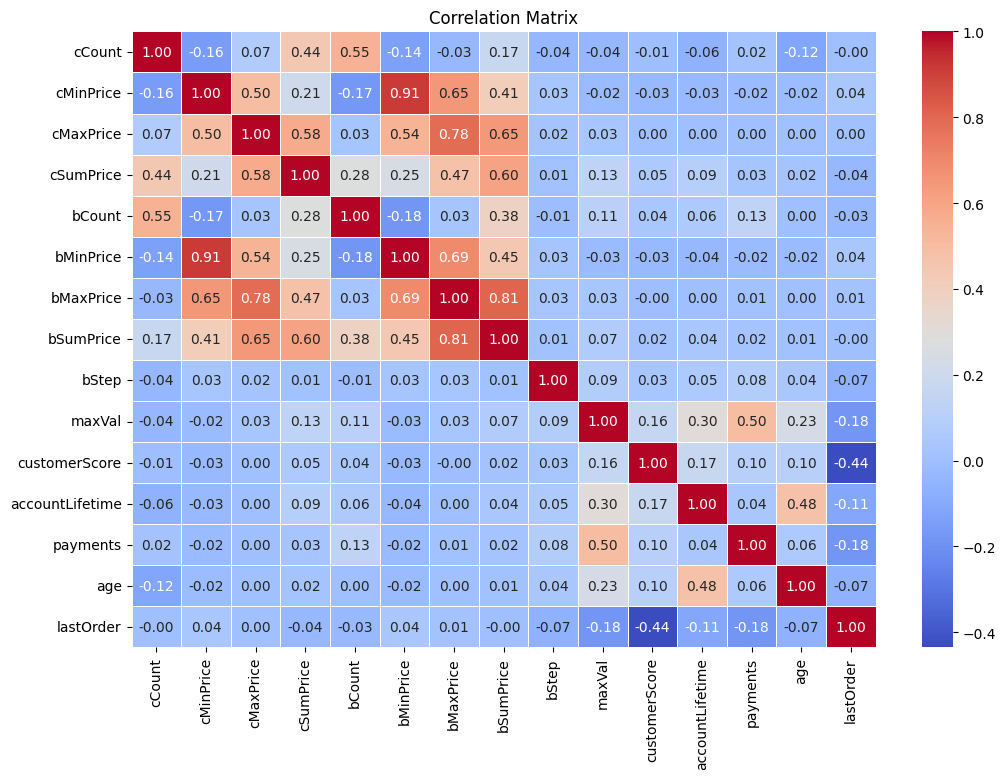

In [64]:
# Menghitung korelasi antara kolom numerik
correlation_matrix = data_split[numerical_columns].corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

1. Hubungan antar harga produk (cMinPrice, cMaxPrice, cSumPrice, bMinPrice, bMaxPrice, bSumPrice):
- cMinPrice memiliki korelasi yang kuat dengan bMinPrice (0.91), yang menunjukkan bahwa harga minimum produk yang diklik sering kali sama atau mendekati harga minimum produk yang dimasukkan ke keranjang.
cMaxPrice memiliki korelasi cukup tinggi dengan cSumPrice (0.78) dan bMaxPrice (0.65), menunjukkan bahwa harga tertinggi dari produk yang diklik sering berhubungan dengan total harga produk yang diklik dan yang masuk keranjang.
bMaxPrice dan bSumPrice memiliki korelasi yang kuat (0.81), mengindikasikan bahwa saat harga produk tertinggi di keranjang meningkat, total harga produk di keranjang juga meningkat.

2. Hubungan antar jumlah produk (cCount, bCount):
- cCount memiliki korelasi cukup tinggi dengan bCount (0.55), yang menunjukkan bahwa pelanggan yang mengklik banyak produk juga cenderung menambahkan lebih banyak produk ke dalam keranjang.

3. Hubungan dengan langkah pembelian (bStep):
- bStep memiliki korelasi yang sangat rendah dengan sebagian besar variabel lain, menunjukkan bahwa variabel ini mungkin tidak dipengaruhi secara signifikan oleh jumlah produk atau harga produk yang dimasukkan ke keranjang.

4. Hubungan antara profil pelanggan (maxVal, customerScore, accountLifetime, payments, age, lastOrder):
- customerScore memiliki korelasi negatif sedang dengan lastOrder (-0.44), yang menunjukkan bahwa skor pelanggan cenderung lebih tinggi untuk pelanggan yang baru-baru ini melakukan pemesanan.
accountLifetime memiliki korelasi positif sedang dengan payments (0.50), yang logis karena pelanggan yang memiliki akun lebih lama kemungkinan besar telah melakukan lebih banyak pembayaran.
age juga menunjukkan sedikit korelasi negatif dengan lastOrder (-0.07), yang menunjukkan bahwa usia pelanggan mungkin sedikit terkait dengan waktu sejak pesanan terakhir.

5. Atribut independen (hubungan sangat rendah atau tidak ada korelasi):
- Beberapa atribut, seperti bStep, maxVal, dan onlineStatus (tidak ditampilkan di sini), memiliki korelasi yang sangat rendah dengan atribut lain, yang menunjukkan bahwa variabel-variabel ini mungkin lebih independen atau dipengaruhi oleh faktor-faktor lain yang tidak ada dalam dataset ini.

5. Distribusi Target (Order)

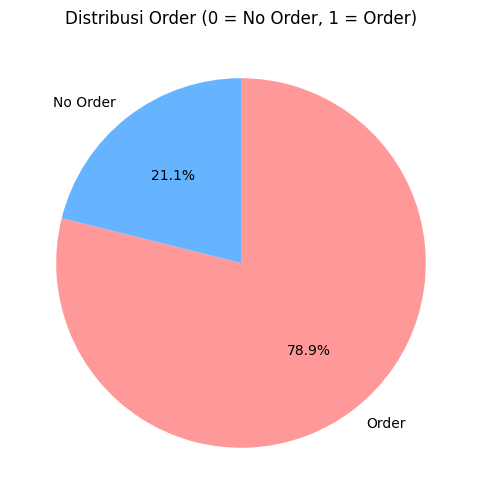

In [65]:
# Menghitung distribusi order
order_counts = data_split['order'].value_counts()

# Membuat pie chart dengan label yang benar
plt.figure(figsize=(8, 6))
plt.pie(order_counts, labels=['Order', 'No Order'], autopct='%1.1f%%', startangle=90, counterclock=False, colors=['#ff9999','#66b3ff'])
plt.title('Distribusi Order (0 = No Order, 1 = Order)')
plt.show()

- Sebanyak 78.9% dari total sesi belanja online menghasilkan pesanan, yang menunjukkan bahwa mayoritas sesi berakhir dengan pelanggan melakukan pembelian.

- Sebaliknya, 21.1% sesi tidak menghasilkan pesanan, yang menunjukkan ada sebagian pelanggan yang tidak menyelesaikan pembelian selama sesi mereka.

In [66]:
# Cek jumlah distribusi order (0 dan 1)
order_counts = data_split['order'].value_counts()
print(order_counts)

order
1    219290
0     58625
Name: count, dtype: int64


6. Distribusi kolom kategorikal (onlineStatus, availability, dan address)

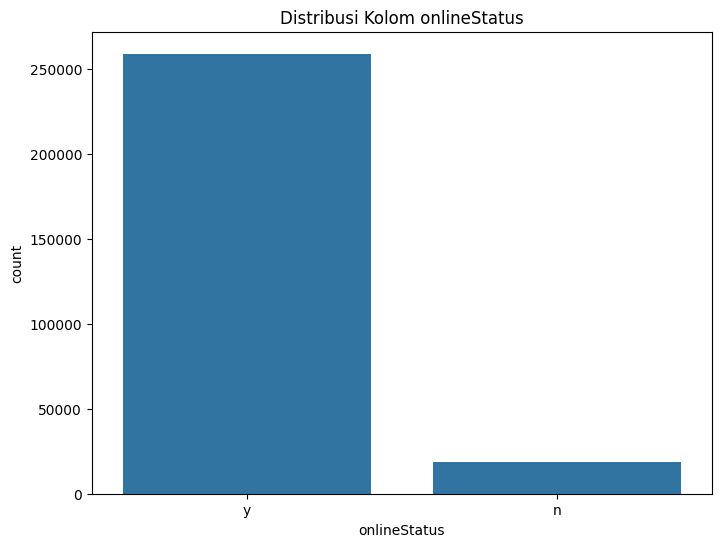

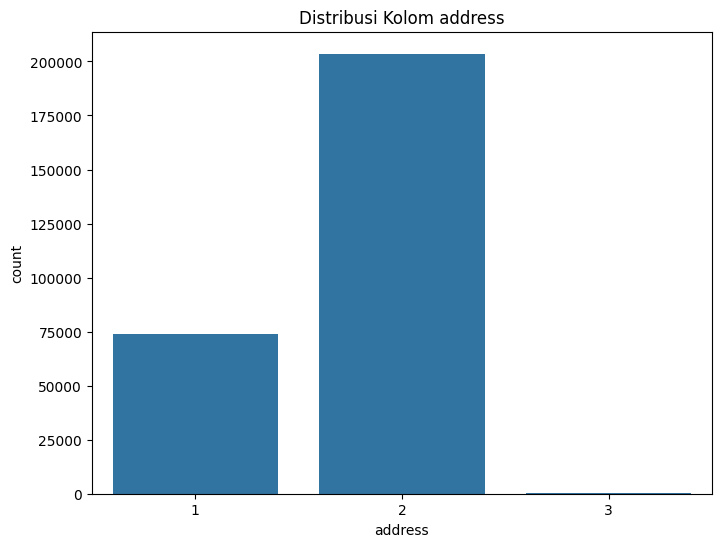

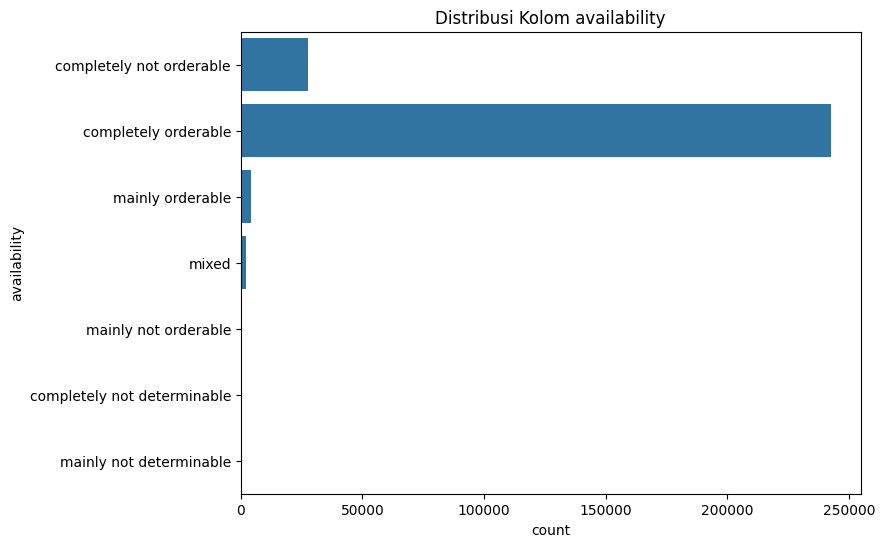

In [67]:
# Menghitung frekuensi untuk kolom kategorikal
categorical_columns = ['onlineStatus', 'address']

# Plot untuk onlineStatus dan address (count plot vertikal)
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data_split)
    plt.title(f'Distribusi Kolom {col}')
    plt.show()

# Plot horizontal untuk kolom availability
plt.figure(figsize=(8, 6))
sns.countplot(y='availability', data=data_split)
plt.title('Distribusi Kolom availability')
plt.show()


Berdasarkan Data onlineStatus banyak customer yang dominannya berstatus online 

berdasarkan adress kode nomor 2 (mrs.) mendominasi lebih banyak menandakan bahwa kebanyakan customer yang melakukan transaksi belanja adalah wanita

Sebagian besar pembelian terjadi pada produk dengan status "completely orderable". Hal ini menunjukkan bahwa produk yang sepenuhnya tersedia memiliki peluang lebih tinggi untuk menghasilkan transaksi atau konversi dibandingkan status lainnya.

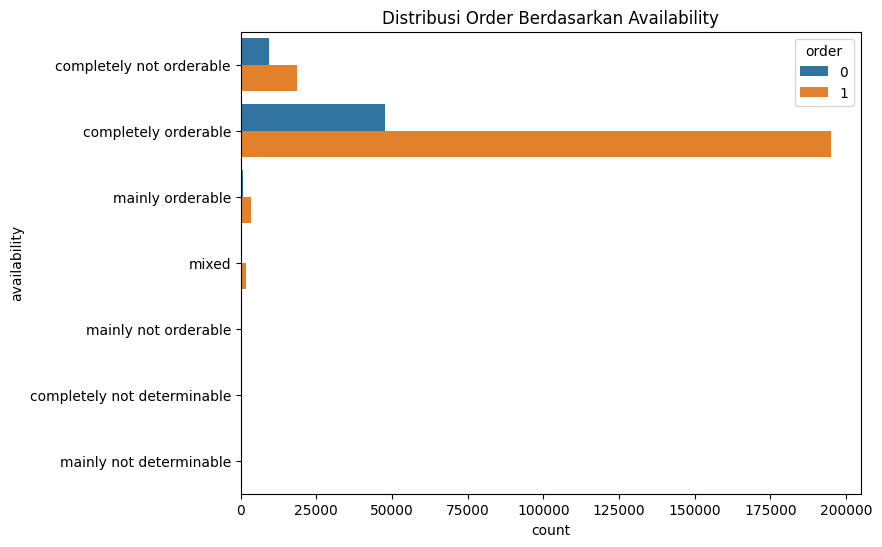

In [68]:
# Distribusi order berdasarkan availability dengan horizontal bar plot
plt.figure(figsize=(8, 6))
sns.countplot(y='availability', hue='order', data=data_split)
plt.title('Distribusi Order Berdasarkan Availability')
plt.show()

- Pada kategori "completely orderable" dan "completely not orderable", terdapat perbedaan signifikan antara sesi yang menghasilkan pembelian (label 1) dan yang tidak (label 0).

- Produk dengan status "completely not orderable" tetap menghasilkan beberapa order, tetapi jumlahnya jauh lebih kecil dibandingkan produk yang completely orderable. Ini mengindikasikan bahwa kendala ketersediaan memang berpengaruh negatif terhadap keputusan pembelian.

7. Interaksi antara beberapa fitur untuk melihat hubungan yang lebih kompleks (hubungan antara age dan lastOrder dan cSumPrice dan bSumPrice)

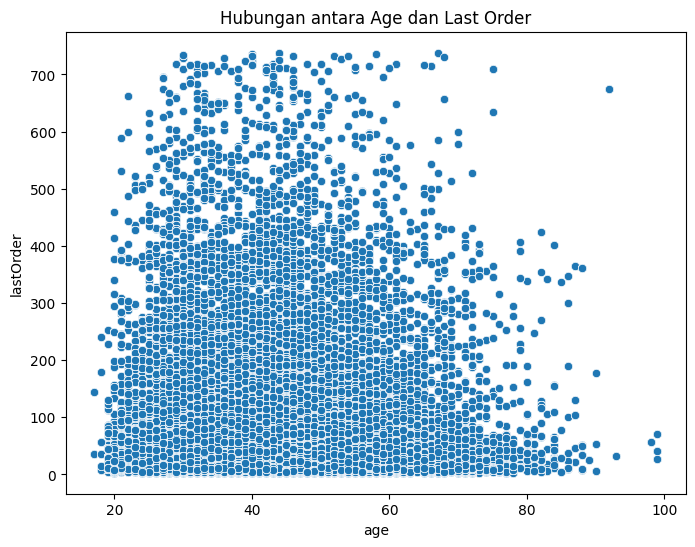

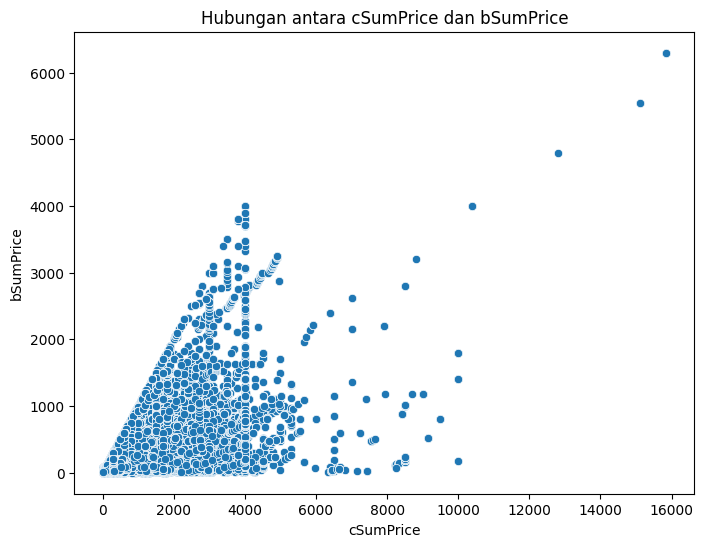

In [69]:
# Scatter plot untuk melihat hubungan antara beberapa fitur
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='lastOrder', data=data_split)
plt.title('Hubungan antara Age dan Last Order')
plt.show()

# Scatter plot antara cSumPrice dan bSumPrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cSumPrice', y='bSumPrice', data=data_split)
plt.title('Hubungan antara cSumPrice dan bSumPrice')
plt.show()


1. Kesimpulan (Age dan LastOrder):

- Secara keseluruhan, grafik ini menunjukkan bahwa waktu sejak pesanan terakhir tidak berkorelasi langsung dengan usia pelanggan. Ini menunjukkan bahwa pola pembelian atau keterlibatan pelanggan dengan platform mungkin lebih dipengaruhi oleh faktor lain selain usia, seperti produk yang ditawarkan, promosi, atau preferensi belanja masing-masing pelanggan.

2. Kesimpulan (cSumPrice dan bSumPrice):

- Secara keseluruhan, ada hubungan positif antara jumlah harga produk yang diklik dan yang dimasukkan ke keranjang, tetapi terdapat seleksi pada produk yang akhirnya masuk ke keranjang. Grafik ini menunjukkan bahwa perilaku klik belum tentu menjamin bahwa pelanggan akan melanjutkan semua produk tersebut ke tahap berikutnya.

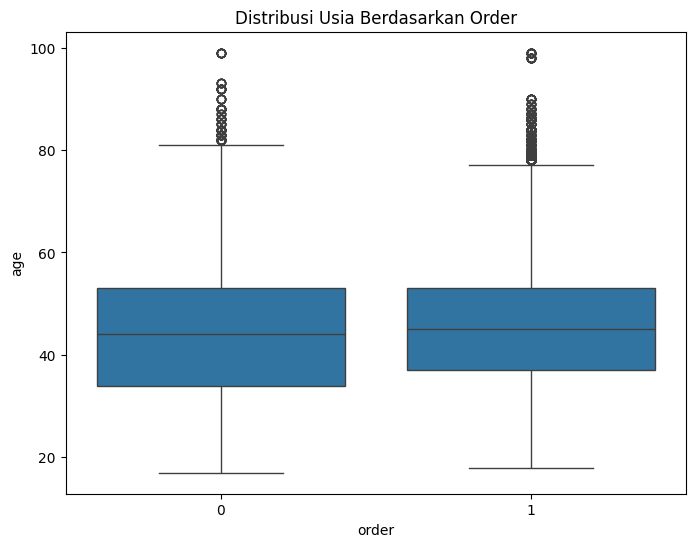

In [70]:
# Analisis usia berdasarkan order
plt.figure(figsize=(8, 6))
sns.boxplot(x='order', y='age', data=data_split)
plt.title('Distribusi Usia Berdasarkan Order')
plt.show()

Median usia pengguna yang menghasilkan order (nilai 1) dan yang tidak menghasilkan order (nilai 0) terlihat mirip, berada di sekitar usia 40-an.
Hal ini menunjukkan bahwa dari segi usia, tidak ada perbedaan signifikan antara pelanggan yang melakukan pembelian dan yang tidak.
Sebaran Usia:

Rentang usia untuk kedua kategori (mereka yang menghasilkan order dan yang tidak) cukup luas, mencakup dari usia sekitar 20 hingga 80 tahun.
Kelompok usia di atas 80 tahun muncul sebagai outlier, terutama untuk kategori tanpa order. Ini menunjukkan bahwa jumlah pelanggan lansia (80+) yang melakukan sesi belanja lebih sedikit dan cenderung tidak menghasilkan order.
Outlier:

Terdapat banyak outlier di kedua kategori, terutama di rentang usia 70 ke atas. Ini menunjukkan bahwa ada beberapa sesi belanja dari pelanggan yang lebih tua, tetapi mereka adalah kasus yang jarang.
Outlier ini menandakan bahwa sebagian besar pengguna berusia lanjut mungkin tidak terlalu aktif atau sering berbelanja dibandingkan dengan pengguna yang lebih muda.
Kesimpulan:

Usia tidak terlihat sebagai faktor signifikan yang membedakan antara pelanggan yang melakukan pembelian (order) dan yang tidak, karena distribusi usia antara kedua kelompok hampir sama.
Meskipun pelanggan dari berbagai kelompok usia terlibat dalam sesi belanja, tingkat pembelian tidak berbeda jauh berdasarkan usia.
Secara keseluruhan, hal ini menunjukkan bahwa faktor lain, selain usia, mungkin lebih berperan dalam menentukan apakah pelanggan melakukan pembelian atau tidak dalam sesi tersebut.
Plot ini memberikan insight bahwa toko tidak perlu membedakan strategi berdasarkan usia saja, karena usia tidak tampak sebagai penentu utama dalam perilaku pembelian pelanggan.

Pengeluaran Total Berdasarkan Usia

In [71]:
# Mengelompokkan usia dalam kategori
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']
data_split['age_group'] = pd.cut(data_split['age'], bins=bins, labels=labels)

# Menghitung total pengeluaran (total price) berdasarkan cSumPrice dan bSumPrice
data_split['total_spend'] = data_split['cSumPrice'] + data_split['bSumPrice']

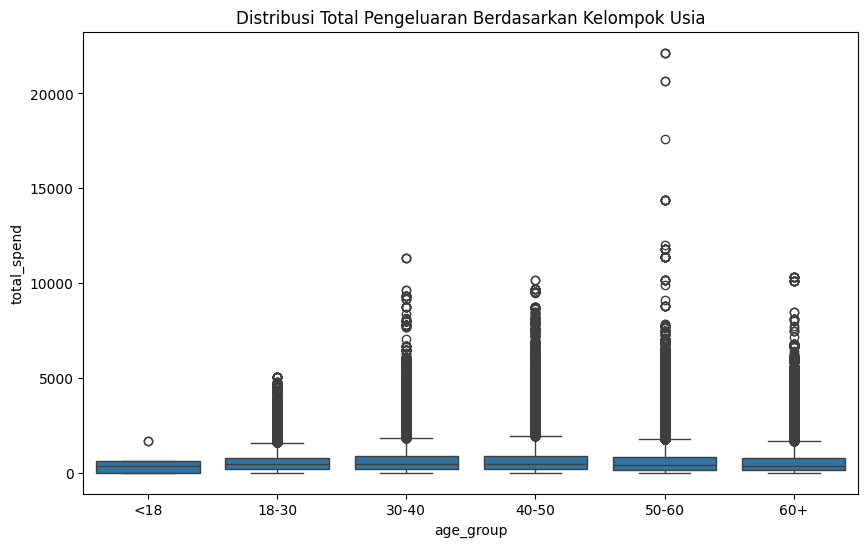

In [72]:
# Visualisasi total pengeluaran berdasarkan kelompok usia
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='total_spend', data=data_split)
plt.title('Distribusi Total Pengeluaran Berdasarkan Kelompok Usia')
plt.show()

Sebaran Pengeluaran: Pada setiap kelompok usia, terdapat banyak data yang berada di dekat bagian bawah box plot. Hal ini menunjukkan bahwa sebagian besar pengeluaran berada pada rentang yang relatif rendah.

Outlier: Terdapat banyak outlier di semua kelompok usia, terutama pada kelompok usia 30-40 dan 50-60. Outlier tersebut menunjukkan adanya beberapa sesi belanja dengan pengeluaran yang jauh lebih tinggi dibandingkan sesi lainnya, yang mungkin disebabkan oleh pembelian produk dengan harga tinggi atau pembelian dalam jumlah banyak.

Perbandingan Kelompok Usia:

Meskipun setiap kelompok usia memiliki pengeluaran yang tinggi (terlihat dari outlier), tampaknya tidak ada perbedaan signifikan dalam median pengeluaran antar kelompok usia, karena posisi garis median pada setiap box plot hampir serupa.
Hal ini menunjukkan bahwa pengeluaran rata-rata atau tipikal untuk semua kelompok usia mungkin mirip, meskipun terdapat beberapa sesi dengan pengeluaran yang jauh lebih tinggi di setiap kelompok.
Kesimpulan:

Secara umum, sebagian besar pelanggan dari semua kelompok usia cenderung memiliki pola pengeluaran yang mirip.
Kelompok usia 30-40 dan 50-60 mungkin lebih berpotensi melakukan pengeluaran tinggi (dilihat dari jumlah outlier yang lebih banyak), tetapi rata-rata pengeluaran keseluruhan setiap kelompok usia tidak berbeda jauh.
Analisis ini menunjukkan bahwa meskipun setiap kelompok usia memiliki potensi melakukan pembelian dalam jumlah besar, rata-rata pengeluaran tidak jauh berbeda di antara mereka.

Latih Model setelah penanganan NaN

In [73]:
from sklearn.model_selection import train_test_split
# Memisahkan data menjadi fitur (X) dan target (y)
X = data_split.drop(columns=['order'])
y = data_split['order']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Memisahkan data menjadi fitur (X) dan target (y)
X = data_split.drop(columns=['order'])
y = data_split['order']

In [75]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Cek tipe data y_train
print(y_train.dtype)

# Cek apakah semua nilai di y_train sudah dalam bentuk 1 atau 0
print(y_train.unique())

int64
[1 0]


In [77]:
# Konversi semua kolom di X_train dan X_test ke tipe data numerik jika belum
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

pengecekan missing value pada X_train dan X_test

In [78]:
print(X_train.isna().sum())  # Mengecek jumlah NaN per kolom di X_train
print(X_test.isna().sum())   # Mengecek jumlah NaN per kolom di X_test

sessionNo               0
startHour               0
startWeekday            0
duration                0
cCount                  0
cMinPrice               0
cMaxPrice               0
cSumPrice               0
bCount                  0
bMinPrice               0
bMaxPrice               0
bSumPrice               0
bStep                   0
onlineStatus       222332
availability       222332
customerNo              0
maxVal                  0
customerScore           0
accountLifetime         0
payments                0
age                     0
address                 0
lastOrder               0
age_group          222332
total_spend             0
dtype: int64
sessionNo              0
startHour              0
startWeekday           0
duration               0
cCount                 0
cMinPrice              0
cMaxPrice              0
cSumPrice              0
bCount                 0
bMinPrice              0
bMaxPrice              0
bSumPrice              0
bStep                  0
onlineStatus

 munculnya NaN disebabkan karena kolom seperti availability dan onlineStatus adalah tipe data string, pada proses sebelumnya mencoba mengonversinya langsung ke integer, maka Pandas akan menghasilkan NaN karena tidak bisa mengonversi nilai string menjadi integer.

OnlineStatus (y/n): Kolom ini hanya memiliki dua nilai, yaitu 'y' dan 'n'. Karena itu, Label Encoding akan menjadi pilihan yang tepat untuk mengubahnya menjadi nilai numerik.

In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X_train['onlineStatus'] = label_encoder.fit_transform(X_train['onlineStatus'])
X_test['onlineStatus'] = label_encoder.transform(X_test['onlineStatus'])

One-Hot Encoding untuk Availability dan Age_group:
Karena kedua kolom ini memiliki banyak kategori, kita bisa menggunakan pd.get_dummies() untuk mengubahnya menjadi beberapa kolom biner

In [80]:
X_train = pd.get_dummies(X_train, columns=['availability', 'age_group'])
X_test = pd.get_dummies(X_test, columns=['availability', 'age_group'])

cek missing value kembali

In [81]:
X_train.isna().sum()  # Mengecek NaN di X_train
X_test.isna().sum()   # Mengecek NaN di X_test

sessionNo          0
startHour          0
startWeekday       0
duration           0
cCount             0
cMinPrice          0
cMaxPrice          0
cSumPrice          0
bCount             0
bMinPrice          0
bMaxPrice          0
bSumPrice          0
bStep              0
onlineStatus       0
customerNo         0
maxVal             0
customerScore      0
accountLifetime    0
payments           0
age                0
address            0
lastOrder          0
total_spend        0
dtype: int64

In [82]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [83]:
# Memprediksi hasil pada data uji
y_pred = model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Mengevaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.78820862493928
Confusion Matrix:
 [[  324 11391]
 [  381 43487]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.03      0.05     11715
           1       0.79      0.99      0.88     43868

    accuracy                           0.79     55583
   macro avg       0.63      0.51      0.47     55583
weighted avg       0.72      0.79      0.71     55583



Akurasi model relatif tinggi (sekitar 78.8%)

Confusion Matrix:
- True Negative (TN) = 324: Model memprediksi non-pesanan (order = 0) dengan benar.
- False Positive (FP) = 11391: Model salah memprediksi pesanan (order = 1) sebagai non-pesanan.
- False Negative (FN) = 381: Model salah memprediksi non-pesanan (order = 0) sebagai pesanan.
- True Positive (TP) = 43487: Model memprediksi pesanan (order = 1) dengan benar.

Classification Report:
1. Precision untuk kelas 0 (non-pesanan) adalah 0.46 dan untuk kelas 1 (pesanan) adalah 0.79:

- Precision mengukur seberapa banyak prediksi positif yang benar. Model lebih akurat dalam memprediksi kelas 1 (pesanan), tetapi kurang akurat dalam memprediksi kelas 0 (non-pesanan).

2. Recall untuk kelas 0 adalah 0.03 dan untuk kelas 1 adalah 0.99:

- Recall mengukur seberapa banyak prediksi yang benar dari total data yang benar-benar ada. Model sangat baik dalam mendeteksi kelas 1 (pesanan) (99% recall), tetapi sangat buruk dalam mendeteksi kelas 0 (non-pesanan), hanya mendeteksi 3% dari semua non-pesanan yang benar.

3. F1-Score untuk kelas 0 adalah 0.05 dan untuk kelas 1 adalah 0.88:

- F1-Score adalah gabungan dari precision dan recall, yang lebih menekankan pada keseimbangan antara keduanya. Kelas 1 (pesanan) memiliki F1-Score yang tinggi, tetapi kelas 0 (non-pesanan) memiliki F1-Score yang sangat rendah, yang menandakan ketidakseimbangan antara kedua kelas.

Melakukan Training model dengan perubahan parameter

In [85]:
from sklearn.linear_model import LogisticRegression

# Membuat model dengan parameter terbaik
model_tuned = LogisticRegression(C=0.1, solver='liblinear', max_iter=1000)

# Melatih model dengan data training
model_tuned.fit(X_train, y_train)

# Evaluasi model pada data test
y_pred = model_tuned.predict(X_test)

# Menampilkan hasil evaluasi
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

# Matriks Kebingunguan
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Laporan Klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 0.7903675584261375
Confusion Matrix:
[[  306 11409]
 [  243 43625]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.03      0.05     11715
           1       0.79      0.99      0.88     43868

    accuracy                           0.79     55583
   macro avg       0.68      0.51      0.47     55583
weighted avg       0.74      0.79      0.71     55583



Menunjukkan sedikit perbaikan dibandingkan dengan model sebelumnya, dengan akurasi yang hampir sama (sekitar 79.04%).

Confusion Matrix:
- True Negative (TN) = 306: Model memprediksi non-pesanan (order = 0) dengan benar.
- False Positive (FP) = 11409: Model salah memprediksi pesanan (order = 1) sebagai non-pesanan.
- False Negative (FN) = 243: Model salah memprediksi non-pesanan (order = 0) sebagai pesanan.
- True Positive (TP) = 43625: Model memprediksi pesanan (order = 1) dengan benar.

Classification Report:
- Precision untuk kelas 0 (non-pesanan) meningkat dari 0.46 menjadi 0.56:
- Model sedikit lebih akurat dalam memprediksi kelas 0, namun tetap jauh dari ideal.
- Recall untuk kelas 0 tetap rendah, hanya 0.03.
- Model masih sangat buruk dalam mendeteksi kelas 0 (non-pesanan). Artinya, sebagian besar data non-pesanan masih terabaikan atau salah diprediksi sebagai pesanan.
- F1-Score untuk kelas 0 meningkat sedikit dari 0.05 menjadi 0.05 (sangat rendah)
- Meskipun precision sedikit lebih baik, recall yang tetap rendah menyebabkan F1-Score untuk kelas 0 tetap buruk.
F1-Score untuk kelas 1 (pesanan) tetap sangat baik pada 0.88, menunjukkan bahwa model masih sangat kuat dalam memprediksi pesanan.

Mencoba Model lain

Menggunakan Model XgBoost

In [86]:
pip install xgboost

In [87]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Membuat model XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Melatih model
xgb_model.fit(X_train, y_train)

# Membuat prediksi
y_pred = xgb_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Akurasi: 0.8671536261087023
Confusion Matrix:
[[ 4846  6869]
 [  515 43353]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.41      0.57     11715
           1       0.86      0.99      0.92     43868

    accuracy                           0.87     55583
   macro avg       0.88      0.70      0.74     55583
weighted avg       0.87      0.87      0.85     55583



Hasil menggunakan XGBoost menunjukkan peningkatan signifikan dalam performa model dibandingkan dengan Logistic Regression.(Akurasi mendekati 87%)

Confusion Matrix:
- True Negative (TN) = 4846: Model berhasil memprediksi non-pesanan (order = 0) dengan benar.
- False Positive (FP) = 6869: Model salah memprediksi pesanan (order = 1) sebagai non-pesanan.
- False Negative (FN) = 515: Model salah memprediksi non-pesanan (order = 0) sebagai pesanan.
- True Positive (TP) = 43353: Model berhasil memprediksi pesanan (order = 1) dengan benar.

Classification Report:
1. Precision:
Untuk kelas 0 (non-pesanan), precision meningkat secara signifikan menjadi 0.90, yang berarti bahwa sebagian besar prediksi non-pesanan oleh model adalah benar.
Untuk kelas 1 (pesanan), precision sedikit menurun menjadi 0.86, tetapi tetap tinggi.

2. Recall:
Recall untuk kelas 0 (non-pesanan) tetap lebih rendah di 0.41, yang menunjukkan bahwa meskipun model lebih baik dalam memprediksi kelas 0, masih banyak non-pesanan yang salah diprediksi sebagai pesanan.
Recall untuk kelas 1 (pesanan) sangat tinggi pada 0.99, yang berarti model hampir selalu berhasil memprediksi pesanan dengan benar.

3. F1-Score:
F1-Score untuk kelas 0 (non-pesanan) adalah 0.57, yang lebih baik dibandingkan dengan model sebelumnya (Logistic Regression), menunjukkan bahwa model XGBoost lebih seimbang dalam memprediksi kelas non-pesanan.
F1-Score untuk kelas 1 (pesanan) sangat baik pada 0.92, menunjukkan performa luar biasa dalam memprediksi pesanan.

4. Akurasi:
Akurasi keseluruhan adalah 0.87, yang lebih tinggi daripada model sebelumnya. Akurasi ini lebih mencerminkan performa model yang baik, terutama karena recall untuk kelas 1 sangat tinggi, meskipun recall untuk kelas 0 masih bisa ditingkatkan.

5. Macro Average:
Macro Average menunjukkan nilai 0.88 untuk precision, 0.70 untuk recall, dan 0.74 untuk F1-Score. Ini menunjukkan bahwa model bekerja lebih baik dalam memprediksi kelas mayoritas (pesanan), meskipun masih ada ketidakseimbangan dalam kemampuan deteksi untuk kelas minoritas (non-pesanan).

6. Weighted Average:
Weighted Average memberikan gambaran yang lebih realistis dari keseluruhan model, dengan 0.87 untuk precision, 0.87 untuk recall, dan 0.85 untuk F1-Score, yang menunjukkan bahwa model memberikan hasil yang sangat baik pada data secara keseluruhan.

Menggunakan Model RandomForest

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# Membuat prediksi
y_pred = rf_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 0.9568753036000216
Confusion Matrix:
[[ 9500  2215]
 [  182 43686]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     11715
           1       0.95      1.00      0.97     43868

    accuracy                           0.96     55583
   macro avg       0.97      0.90      0.93     55583
weighted avg       0.96      0.96      0.96     55583



Hasil menggunakan Random Forest menunjukkan performa yang sangat baik, bahkan lebih baik dari XGBoost dan LogisticRegression.(Akurasi mendekati 96%)

Confussion Matrix:
- True Negative (TN) = 9500: Model berhasil memprediksi non-pesanan (order = 0) dengan sangat baik.
- False Positive (FP) = 2215: Model salah memprediksi pesanan (order = 1) sebagai non-pesanan.
- False Negative (FN) = 182: Model salah memprediksi non-pesanan (order = 0) sebagai pesanan.
- True Positive (TP) = 43686: Model berhasil memprediksi pesanan (order = 1) dengan sangat baik.

Classification Report:

1. Precision:
Untuk kelas 0 (non-pesanan), precision adalah 0.98, yang sangat baik, menunjukkan bahwa sebagian besar prediksi non-pesanan adalah benar.
Untuk kelas 1 (pesanan), precision adalah 0.95, yang masih sangat tinggi, meskipun sedikit lebih rendah dibandingkan kelas 0.

2. Recall:
Recall untuk kelas 0 (non-pesanan) adalah 0.81, menunjukkan bahwa model berhasil menangani prediksi non-pesanan dengan cukup baik, meskipun masih ada beberapa kesalahan.
Recall untuk kelas 1 (pesanan) sangat tinggi pada 1.00, yang berarti model hampir selalu memprediksi pesanan dengan benar, yang merupakan hasil luar biasa.

3. F1-Score:
F1-Score untuk kelas 0 (non-pesanan) adalah 0.89, yang menunjukkan keseimbangan yang baik antara precision dan recall untuk kelas ini.
F1-Score untuk kelas 1 (pesanan) adalah 0.97, yang sangat baik, menunjukkan bahwa model sangat efektif dalam memprediksi pesanan.

4. Akurasi:
Akurasi keseluruhan model adalah 0.96, yang sangat tinggi, mencerminkan performa model yang sangat baik dalam memprediksi baik kelas 0 maupun kelas 1.

5. Macro Average:
Macro Average memberikan nilai 0.97 untuk precision, 0.90 untuk recall, dan 0.93 untuk F1-Score. Ini menunjukkan bahwa model bekerja sangat baik pada kedua kelas, dengan recall yang sedikit lebih rendah pada kelas 0 dibandingkan kelas 1.

6. Weighted Average:
Weighted Average menunjukkan nilai 0.96 untuk precision, 0.96 untuk recall, dan 0.96 untuk F1-Score, yang menunjukkan bahwa model memberikan hasil yang sangat baik pada keseluruhan data, dengan keseimbangan yang sangat baik antara kedua kelas.